The following notebook will explore underfitting and over fitting of classification data, the metrics to use in order to spot these and what might be causing it.

We are going to begin with the same basic model used in the first tutorial where we are determining a simple classification boundary between data descirbed by two features x1 and x2.

Begin with necesary imports.

In [2]:
import keras
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
C:\Users\zyv57124\AppData\Local\Continuum\miniconda3\envs\tomo\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\zyv57124\AppData\Local\Continuum\miniconda3\envs\tomo\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Import the classifcation data and seperate into feature and label arrays.

We can plot our data set and begin to get an idea of the how the two classes are distributed in relation to the features x1 and x2.

In [4]:
dataset = make_circles(n_samples=300,noise=0.20,factor=0.0, random_state=1)

features = dataset[0]
labels = dataset[1]

features[:,0] = (features[:,0]+1.5)/3.0
features[:,1] = (features[:,1]+1.5)/3.0


We next need to generate some variables that describe some infromation about our dataset. Specifically the length of our data set, the max and min values for both x1 and x2 features.

We also need to seperate our data into training and testing for cross validation of our model and therefore check for overfitting and underfitting. We are going to split our data 70% training 30% testing.

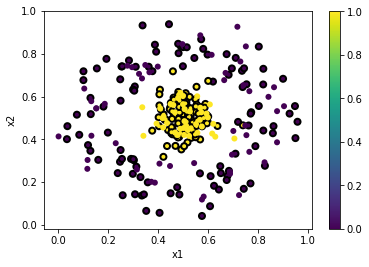

In [10]:
data_len = features.shape[0]

x1_min = np.amin(features[:,0])
x1_max = np.amax(features[:,0])
x2_min = np.amin(features[:,1])
x2_max = np.amax(features[:,1])

splitRatio = 0.7

X_train = features[:int(data_len*splitRatio)]
X_test = features[int(data_len*splitRatio):]
y_train = labels[:int(data_len*splitRatio)]
y_test = labels[int(data_len*splitRatio):]

plt.scatter(X_train[:,0],X_train[:,1],edgecolor="black",linewidth=2,c=y_train)
plt.scatter(X_test[:,0],X_test[:,1],linewidth=0,c=y_test)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

We can now begin to build our network model, the most likely cause of underfitting is an overly simplified model. In order to explore this we will build an extremly simple model, here we will input the two features x1 and x2 into a single hidden layer of just two neurons that the feed into the a single output neuron, all neurons will utilise the sigmoid activation function.

In [11]:
layers = []
layers.append(keras.layers.Dense(2,input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))
model = keras.Sequential(layers)

We will use the Adam optimiser with a learning rate of 0.1 and the binary crossentropy loss function to train our model. We will also use a cross validation data set to monitor how the training fits this test dataset throughout the training process.

In [12]:
model.compile(optimizer=keras.optimizers.Adam(lr=1), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=X_train.shape[0],epochs=1000, verbose=1)

Train on 210 samples, validate on 90 samples
Epoch 1/1000
210/210 [==============================] - 0s 1ms/step - loss: 0.6915 - binary_accuracy: 0.6286 - categorical_accuracy: 1.0000 - val_loss: 1.5659 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 2/1000
210/210 [==============================] - 0s 74us/step - loss: 1.3862 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.8771 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 3/1000
210/210 [==============================] - 0s 19us/step - loss: 0.8064 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7065 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 4/1000
210/210 [==============================] - 0s 19us/step - loss: 0.7424 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.7849 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 5/1000
210/210 [==============================] - 

Epoch 38/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6946 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.6945 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 39/1000
210/210 [==============================] - 0s 38us/step - loss: 0.6927 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6999 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 40/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6926 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7057 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 41/1000
210/210 [==============================] - 0s 38us/step - loss: 0.6939 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7099 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 42/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6953 - binary_ac

Epoch 75/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6925 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6957 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 76/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6925 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6965 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 77/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6975 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 78/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6983 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 79/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_ac

Epoch 112/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6975 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 113/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6975 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 114/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6975 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 115/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6973 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 116/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - bina

Epoch 149/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 150/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 151/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 152/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6973 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 153/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - bina

Epoch 186/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 187/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 188/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 189/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 190/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - bina

Epoch 223/1000
210/210 [==============================] - 0s 0us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 224/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 225/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 226/1000
210/210 [==============================] - 0s 0us/step - loss: 0.6924 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 227/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6924 - binary

Epoch 260/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6923 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 261/1000
210/210 [==============================] - 0s 0us/step - loss: 0.6923 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 262/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6923 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 263/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6923 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 264/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6923 - binar

Epoch 297/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6922 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 298/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6922 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 299/1000
210/210 [==============================] - 0s 0us/step - loss: 0.6922 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 300/1000
210/210 [==============================] - 0s 0us/step - loss: 0.6922 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 301/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6922 - binary

Epoch 334/1000
210/210 [==============================] - 0s 38us/step - loss: 0.6450 - binary_accuracy: 0.6905 - categorical_accuracy: 1.0000 - val_loss: 0.6733 - val_binary_accuracy: 0.6000 - val_categorical_accuracy: 1.0000
Epoch 335/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6338 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6712 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 336/1000
210/210 [==============================] - 0s 19us/step - loss: 0.6253 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6711 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 337/1000
210/210 [==============================] - 0s 38us/step - loss: 0.6155 - binary_accuracy: 0.6810 - categorical_accuracy: 1.0000 - val_loss: 0.6473 - val_binary_accuracy: 0.6000 - val_categorical_accuracy: 1.0000
Epoch 338/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5992 - bina

Epoch 371/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5269 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6173 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 372/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5268 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6186 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 373/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5265 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6213 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 374/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5262 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6250 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 375/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5260 - binary_

Epoch 408/1000
210/210 [==============================] - 0s 21us/step - loss: 0.5226 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6420 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 409/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5225 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6419 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 410/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5224 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6421 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 411/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5224 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6427 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 412/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5223 - binary

Epoch 445/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5206 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6574 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 446/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5205 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6577 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 447/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5205 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6580 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 448/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5204 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6583 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 449/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5204 - binar

Epoch 482/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5192 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6705 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 483/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5192 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6709 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 484/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5191 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6712 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 485/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5191 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6716 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 486/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5191 - binary

Epoch 519/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5181 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6827 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 520/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5181 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6831 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 521/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5181 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6834 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 522/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5181 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6837 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 523/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5180 - binary_

Epoch 556/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5173 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6942 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 557/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5173 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6945 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 558/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5172 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6948 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 559/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5172 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.6951 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 560/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5172 - binar

Epoch 593/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5166 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7050 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 594/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5166 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7053 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 595/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5166 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7055 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 596/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5165 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7058 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 597/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5165 - binary_

Epoch 630/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5160 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7153 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 631/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5160 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7155 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 632/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5160 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7158 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 633/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5160 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7161 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 634/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5159 - binar

Epoch 667/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5155 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7251 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 668/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5155 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7254 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 669/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5155 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7256 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 670/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5155 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7259 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 671/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5154 - bina

Epoch 704/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5150 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7346 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 705/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5150 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7348 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 706/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5150 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7351 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 707/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5150 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7353 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 708/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5150 - binary_

Epoch 741/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5147 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7437 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 742/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5146 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7439 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 743/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5146 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7441 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 744/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5146 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7444 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 745/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5146 - binary_ac

Epoch 778/1000
210/210 [==============================] - 0s 38us/step - loss: 0.5143 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7525 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 779/1000
210/210 [==============================] - 0s 38us/step - loss: 0.5143 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7527 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 780/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5143 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7529 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 781/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5143 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7532 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 782/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5143 - bina

Epoch 815/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5140 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7610 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 816/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5140 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7612 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 817/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5140 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7614 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 818/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5140 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7616 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 819/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5139 - binary_

Epoch 852/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5137 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7692 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 853/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5137 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7694 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 854/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5137 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7696 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 855/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5137 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7699 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 856/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5137 - binar

Epoch 889/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5134 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7772 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 890/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5134 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7774 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 891/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5134 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7776 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 892/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5134 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7778 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 893/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5134 - binar

Epoch 926/1000
210/210 [==============================] - 0s 38us/step - loss: 0.5132 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7850 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 927/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5132 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7852 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 928/1000
210/210 [==============================] - 0s 38us/step - loss: 0.5132 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7854 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 929/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5132 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7856 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 930/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5131 - binary

Epoch 963/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5129 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7926 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 964/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5129 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7928 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 965/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5129 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7930 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 966/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5129 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.7932 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000
Epoch 967/1000
210/210 [==============================] - 0s 0us/step - loss: 0.5129 - binar

Epoch 1000/1000
210/210 [==============================] - 0s 19us/step - loss: 0.5127 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.8000 - val_binary_accuracy: 0.6444 - val_categorical_accuracy: 1.0000


Now here we will plot the recorded loss at each epoch of the training process for both the training and test data.

From the reuslting curve we already have a sign that we have an underfitting model. The backpropagation algorithm used to train this model aims to minimise the loss function, moving its value closer to zero with every iteration (epoch). The training is said to have converged when the loss no longer changes with every epoch trained over.

The most basic form of loss function is a least mean squared difference between our labels (or ground truths) and the output of our network for each item in our training data. As such the loss value is useful metric for determing how well our model fits the data.

For the model we have just trained we can see that the training has converged at a value of ~0.5, a value far from 0 and an obvious sign that we need to tweak somthing about our model. 

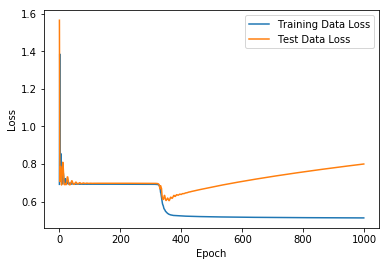

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.plot(epoch,val_loss,label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


As our trianing data consists of only two features we can plot a decision boundary for our trained model.

The reuslt is a clear underfitting of our training data.

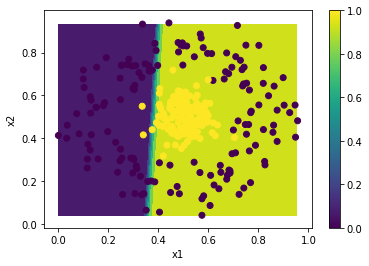

In [14]:
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

As stated previously, our model was purposly made to be as simple as possible in order to demonstrate underfitting. Let us now increase the complexity of the model. Specifically, we will increase the number of hidden layers to 2 and also the number of neurons in each layer.

In [15]:
layers = []
layers.append(keras.layers.Dense(8,input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(6, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))

model = keras.Sequential(layers)

In [16]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.03), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=X_train.shape[0],epochs=3000, verbose=2)

Train on 210 samples, validate on 90 samples
Epoch 1/3000
 - 0s - loss: 0.7036 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.7022 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 2/3000
 - 0s - loss: 0.6931 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6914 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 3/3000
 - 0s - loss: 0.6944 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.6896 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 4/3000
 - 0s - loss: 0.6975 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.6899 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 5/3000
 - 0s - loss: 0.6966 - binary_accuracy: 0.4810 - categorical_accuracy: 1.0000 - val_loss: 0.6916 - val_binary_accuracy: 0.5444 - val_categorical_accuracy: 1.0000
Epoch 6/3000
 - 0s - loss: 0.6942 - binary_accuracy: 0.4810 - categorical_accura

Epoch 48/3000
 - 0s - loss: 0.6913 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6984 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 49/3000
 - 0s - loss: 0.6912 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6983 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 50/3000
 - 0s - loss: 0.6911 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6978 - val_binary_accuracy: 0.4556 - val_categorical_accuracy: 1.0000
Epoch 51/3000
 - 0s - loss: 0.6910 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4667 - val_categorical_accuracy: 1.0000
Epoch 52/3000
 - 0s - loss: 0.6909 - binary_accuracy: 0.5190 - categorical_accuracy: 1.0000 - val_loss: 0.6966 - val_binary_accuracy: 0.4889 - val_categorical_accuracy: 1.0000
Epoch 53/3000
 - 0s - loss: 0.6908 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6962 - val_bin

Epoch 95/3000
 - 0s - loss: 0.6325 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6626 - val_binary_accuracy: 0.6222 - val_categorical_accuracy: 1.0000
Epoch 96/3000
 - 0s - loss: 0.6287 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6600 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 97/3000
 - 0s - loss: 0.6248 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6573 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 98/3000
 - 0s - loss: 0.6210 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6547 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 99/3000
 - 0s - loss: 0.6173 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6521 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 100/3000
 - 0s - loss: 0.6136 - binary_accuracy: 0.7095 - categorical_accuracy: 1.0000 - val_loss: 0.6495 - val_bi

Epoch 142/3000
 - 0s - loss: 0.4759 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.5327 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 143/3000
 - 0s - loss: 0.4683 - binary_accuracy: 0.7286 - categorical_accuracy: 1.0000 - val_loss: 0.5249 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 144/3000
 - 0s - loss: 0.4602 - binary_accuracy: 0.7524 - categorical_accuracy: 1.0000 - val_loss: 0.5165 - val_binary_accuracy: 0.6889 - val_categorical_accuracy: 1.0000
Epoch 145/3000
 - 0s - loss: 0.4514 - binary_accuracy: 0.7714 - categorical_accuracy: 1.0000 - val_loss: 0.5075 - val_binary_accuracy: 0.7111 - val_categorical_accuracy: 1.0000
Epoch 146/3000
 - 0s - loss: 0.4420 - binary_accuracy: 0.7857 - categorical_accuracy: 1.0000 - val_loss: 0.4979 - val_binary_accuracy: 0.7333 - val_categorical_accuracy: 1.0000
Epoch 147/3000
 - 0s - loss: 0.4322 - binary_accuracy: 0.8048 - categorical_accuracy: 1.0000 - val_loss: 0.4881 - v

Epoch 189/3000
 - 0s - loss: 0.1887 - binary_accuracy: 0.9286 - categorical_accuracy: 1.0000 - val_loss: 0.3086 - val_binary_accuracy: 0.8556 - val_categorical_accuracy: 1.0000
Epoch 190/3000
 - 0s - loss: 0.1861 - binary_accuracy: 0.9286 - categorical_accuracy: 1.0000 - val_loss: 0.3053 - val_binary_accuracy: 0.8556 - val_categorical_accuracy: 1.0000
Epoch 191/3000
 - 0s - loss: 0.1835 - binary_accuracy: 0.9286 - categorical_accuracy: 1.0000 - val_loss: 0.3017 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 192/3000
 - 0s - loss: 0.1810 - binary_accuracy: 0.9286 - categorical_accuracy: 1.0000 - val_loss: 0.2980 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 193/3000
 - 0s - loss: 0.1784 - binary_accuracy: 0.9286 - categorical_accuracy: 1.0000 - val_loss: 0.2940 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 194/3000
 - 0s - loss: 0.1757 - binary_accuracy: 0.9286 - categorical_accuracy: 1.0000 - val_loss: 0.2900 - v

Epoch 236/3000
 - 0s - loss: 0.0669 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.1015 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 237/3000
 - 0s - loss: 0.0657 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0998 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 238/3000
 - 0s - loss: 0.0645 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 239/3000
 - 0s - loss: 0.0633 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 240/3000
 - 0s - loss: 0.0622 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 241/3000
 - 0s - loss: 0.0612 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0939 - v

Epoch 283/3000
 - 0s - loss: 0.0381 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 284/3000
 - 0s - loss: 0.0379 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 285/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 286/3000
 - 0s - loss: 0.0373 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0679 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 287/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 288/3000
 - 0s - loss: 0.0369 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - v

Epoch 330/3000
 - 0s - loss: 0.0301 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0641 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 331/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0641 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 332/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0640 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 333/3000
 - 0s - loss: 0.0298 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0640 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 334/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0640 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 335/3000
 - 0s - loss: 0.0296 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0639 - v

Epoch 377/3000
 - 0s - loss: 0.0261 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 378/3000
 - 0s - loss: 0.0261 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 379/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 380/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 381/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 382/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - v

Epoch 424/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 425/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0634 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 426/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0635 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 427/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0635 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 428/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0635 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 429/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0635 - v

Epoch 471/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0637 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 472/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0637 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 473/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0638 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 474/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0638 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 475/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0638 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 476/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0638 - v

Epoch 518/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 519/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 520/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 521/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 522/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 523/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - v

Epoch 565/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 566/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 567/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 568/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 569/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 570/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - v

Epoch 612/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 613/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 614/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 615/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 616/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 617/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - v

Epoch 659/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0665 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 660/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0632 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 661/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 662/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 663/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 664/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0640 - v

Epoch 706/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 707/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 708/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0653 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 709/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0658 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 710/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0655 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 711/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0655 - v

Epoch 753/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 754/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 755/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 756/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 757/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 758/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - v

Epoch 800/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 801/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 802/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 803/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 804/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 805/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - v

Epoch 847/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 848/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 849/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 850/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 851/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 852/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - v

Epoch 894/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0651 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 895/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0653 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 896/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0652 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 897/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0652 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 898/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0653 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 899/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0651 - v

Epoch 941/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 942/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 943/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 944/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 945/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 946/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - v

Epoch 988/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 989/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0653 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 990/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 991/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0624 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 992/3000
 - 0s - loss: 0.0161 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0650 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 993/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - v

Epoch 1035/3000
 - 0s - loss: 0.0159 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0618 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1036/3000
 - 0s - loss: 0.0159 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1037/3000
 - 0s - loss: 0.0159 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1038/3000
 - 0s - loss: 0.0159 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1039/3000
 - 0s - loss: 0.0159 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1040/3000
 - 0s - loss: 0.0159 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1082/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1083/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1084/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1085/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1086/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1087/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1129/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1130/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0551 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1131/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1132/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0538 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1133/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1134/3000
 - 0s - loss: 0.0157 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1176/3000
 - 0s - loss: 0.0153 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0569 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1177/3000
 - 0s - loss: 0.0153 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0568 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1178/3000
 - 0s - loss: 0.0153 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0573 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1179/3000
 - 0s - loss: 0.0153 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0565 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1180/3000
 - 0s - loss: 0.0153 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1181/3000
 - 0s - loss: 0.0153 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1223/3000
 - 0s - loss: 0.0151 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0554 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1224/3000
 - 0s - loss: 0.0151 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0553 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1225/3000
 - 0s - loss: 0.0151 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0554 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1226/3000
 - 0s - loss: 0.0151 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0553 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1227/3000
 - 0s - loss: 0.0151 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0553 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1228/3000
 - 0s - loss: 0.0151 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1270/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0540 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1271/3000
 - 0s - loss: 0.0150 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0539 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1272/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0539 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1273/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0539 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1274/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0539 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1275/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1317/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0522 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1318/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0515 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1319/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0536 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1320/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1321/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0528 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1322/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0146 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0514 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1364/3000
 - 0s - loss: 0.0146 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0516 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1365/3000
 - 0s - loss: 0.0146 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1366/3000
 - 0s - loss: 0.0146 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0515 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1367/3000
 - 0s - loss: 0.0146 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1368/3000
 - 0s - loss: 0.0146 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_

Epoch 1410/3000
 - 0s - loss: 0.0144 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1411/3000
 - 0s - loss: 0.0144 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1412/3000
 - 0s - loss: 0.0144 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1413/3000
 - 0s - loss: 0.0144 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1414/3000
 - 0s - loss: 0.0144 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1415/3000
 - 0s - loss: 0.0144 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1457/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1458/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1459/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1460/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1461/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1462/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1504/3000
 - 0s - loss: 0.0140 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1505/3000
 - 0s - loss: 0.0140 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1506/3000
 - 0s - loss: 0.0140 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1507/3000
 - 0s - loss: 0.0140 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1508/3000
 - 0s - loss: 0.0140 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1509/3000
 - 0s - loss: 0.0140 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1551/3000
 - 0s - loss: 0.0138 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1552/3000
 - 0s - loss: 0.0138 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1553/3000
 - 0s - loss: 0.0138 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1554/3000
 - 0s - loss: 0.0138 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1555/3000
 - 0s - loss: 0.0138 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1556/3000
 - 0s - loss: 0.0138 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1598/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1599/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1600/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1601/3000
 - 0s - loss: 0.0136 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1602/3000
 - 0s - loss: 0.0135 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1603/3000
 - 0s - loss: 0.0135 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1645/3000
 - 0s - loss: 0.0133 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1646/3000
 - 0s - loss: 0.0133 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1647/3000
 - 0s - loss: 0.0133 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1648/3000
 - 0s - loss: 0.0133 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1649/3000
 - 0s - loss: 0.0133 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0447 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1650/3000
 - 0s - loss: 0.0133 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0452 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1692/3000
 - 0s - loss: 0.0131 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1693/3000
 - 0s - loss: 0.0131 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0415 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1694/3000
 - 0s - loss: 0.0131 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1695/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0410 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1696/3000
 - 0s - loss: 0.0132 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0449 - val_binary_

Epoch 1738/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0433 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1739/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0434 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1740/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0436 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1741/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0432 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1742/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0436 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1743/3000
 - 0s - loss: 0.0128 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1785/3000
 - 0s - loss: 0.0125 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1786/3000
 - 0s - loss: 0.0125 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1787/3000
 - 0s - loss: 0.0125 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1788/3000
 - 0s - loss: 0.0125 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1789/3000
 - 0s - loss: 0.0125 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1790/3000
 - 0s - loss: 0.0125 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0122 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0424 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1832/3000
 - 0s - loss: 0.0122 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0424 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1833/3000
 - 0s - loss: 0.0122 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1834/3000
 - 0s - loss: 0.0122 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1835/3000
 - 0s - loss: 0.0122 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1836/3000
 - 0s - loss: 0.0122 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - val_binary_

Epoch 1878/3000
 - 0s - loss: 0.0119 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1879/3000
 - 0s - loss: 0.0119 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1880/3000
 - 0s - loss: 0.0119 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1881/3000
 - 0s - loss: 0.0119 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0420 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1882/3000
 - 0s - loss: 0.0119 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0420 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1883/3000
 - 0s - loss: 0.0119 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1925/3000
 - 0s - loss: 0.0116 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1926/3000
 - 0s - loss: 0.0116 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1927/3000
 - 0s - loss: 0.0116 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1928/3000
 - 0s - loss: 0.0116 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1929/3000
 - 0s - loss: 0.0116 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1930/3000
 - 0s - loss: 0.0116 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1972/3000
 - 0s - loss: 0.0113 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0420 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1973/3000
 - 0s - loss: 0.0113 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0420 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1974/3000
 - 0s - loss: 0.0113 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1975/3000
 - 0s - loss: 0.0113 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1976/3000
 - 0s - loss: 0.0113 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1977/3000
 - 0s - loss: 0.0113 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2019/3000
 - 0s - loss: 0.0110 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0422 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2020/3000
 - 0s - loss: 0.0110 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0426 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2021/3000
 - 0s - loss: 0.0110 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0422 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2022/3000
 - 0s - loss: 0.0110 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2023/3000
 - 0s - loss: 0.0110 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0422 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2024/3000
 - 0s - loss: 0.0110 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2066/3000
 - 0s - loss: 0.0108 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2067/3000
 - 0s - loss: 0.0108 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0433 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2068/3000
 - 0s - loss: 0.0108 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2069/3000
 - 0s - loss: 0.0107 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0433 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2070/3000
 - 0s - loss: 0.0107 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0429 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2071/3000
 - 0s - loss: 0.0107 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2113/3000
 - 0s - loss: 0.0105 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0439 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2114/3000
 - 0s - loss: 0.0105 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0439 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2115/3000
 - 0s - loss: 0.0105 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0439 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2116/3000
 - 0s - loss: 0.0105 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0440 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2117/3000
 - 0s - loss: 0.0105 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0439 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2118/3000
 - 0s - loss: 0.0105 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2160/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2161/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2162/3000
 - 0s - loss: 0.0103 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2163/3000
 - 0s - loss: 0.0102 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2164/3000
 - 0s - loss: 0.0102 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0451 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2165/3000
 - 0s - loss: 0.0102 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2207/3000
 - 0s - loss: 0.0100 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2208/3000
 - 0s - loss: 0.0100 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2209/3000
 - 0s - loss: 0.0100 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2210/3000
 - 0s - loss: 0.0100 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2211/3000
 - 0s - loss: 0.0100 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2212/3000
 - 0s - loss: 0.0100 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2254/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2255/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0484 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2256/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0484 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2257/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2258/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2259/3000
 - 0s - loss: 0.0098 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2301/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0507 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2302/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0507 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2303/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2304/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2305/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2306/3000
 - 0s - loss: 0.0095 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0094 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0516 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2348/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0547 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2349/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2350/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0526 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2351/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0559 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2352/3000
 - 0s - loss: 0.0093 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0521 - val_binary_

Epoch 2394/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2395/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0578 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2396/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0575 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2397/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0578 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2398/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0579 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2399/3000
 - 0s - loss: 0.0090 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 2441/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2442/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2443/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2444/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2445/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0630 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2446/3000
 - 0s - loss: 0.0087 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2488/3000
 - 0s - loss: 0.0083 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0693 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2489/3000
 - 0s - loss: 0.0083 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0685 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2490/3000
 - 0s - loss: 0.0083 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0699 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2491/3000
 - 0s - loss: 0.0083 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2492/3000
 - 0s - loss: 0.0083 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0708 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2493/3000
 - 0s - loss: 0.0083 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0080 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0767 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2535/3000
 - 0s - loss: 0.0080 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0757 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2536/3000
 - 0s - loss: 0.0080 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0764 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2537/3000
 - 0s - loss: 0.0079 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2538/3000
 - 0s - loss: 0.0079 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0762 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2539/3000
 - 0s - loss: 0.0079 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0773 - val_binary_

Epoch 2581/3000
 - 0s - loss: 0.0076 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2582/3000
 - 0s - loss: 0.0076 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0847 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2583/3000
 - 0s - loss: 0.0075 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0850 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2584/3000
 - 0s - loss: 0.0075 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0850 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2585/3000
 - 0s - loss: 0.0075 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0853 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2586/3000
 - 0s - loss: 0.0075 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2628/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0889 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2629/3000
 - 0s - loss: 0.0074 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0984 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2630/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2631/3000
 - 0s - loss: 0.0072 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0951 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2632/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2633/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2675/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1020 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2676/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2677/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1020 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2678/3000
 - 0s - loss: 0.0065 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1021 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2679/3000
 - 0s - loss: 0.0065 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1019 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2680/3000
 - 0s - loss: 0.0065 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 2722/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1059 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2723/3000
 - 0s - loss: 0.0060 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1059 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2724/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2725/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1059 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2726/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2727/3000
 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 2769/3000
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2770/3000
 - 0s - loss: 0.0053 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2771/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1059 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2772/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2773/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1063 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2774/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 2816/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0988 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2817/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0984 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2818/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0983 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2819/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2820/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0978 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2821/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2863/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0904 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2864/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0886 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2865/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0902 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2866/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0885 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2867/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0893 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2868/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2910/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2911/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2912/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0883 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2913/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2914/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0884 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2915/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2957/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0907 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2958/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0908 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2959/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0909 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2960/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0909 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2961/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 2962/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

Here the difference between the test and training loss is a clear sign of overfitting, where the loss for the test test data is significantly higher than that of the training data which has converged close to zero. In this example the model has attempted to fit every point with a classification of 1 and thereby producing a decicion boundary that is not general enough to fit the test data. The cause here is an overly complicated model that is able to fit any arbitary decision boundary. In practice increasing the amount of test data would help to reduce this over fitting slightly however for practicle purposes this is not always possible.

From the decision boundary drawn we can see that the model is attempting to fit a significant number of outlier points another verification that this model is overfitting the training data.

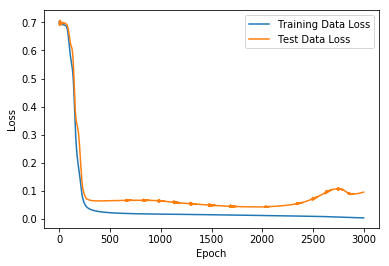

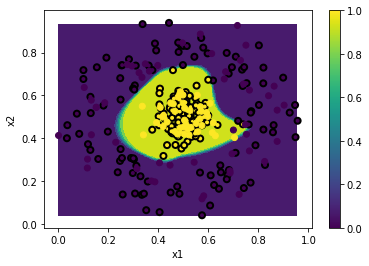

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,(loss), label='Training Data Loss')
plt.plot(epoch,(val_loss),label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(X_train[:,0],X_train[:,1],edgecolor="black",linewidth=2,c=y_train)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

To lessen overfitting of the test data we can simplify our model. This reduces
the complexity of the decision boundary that the model generates.

In [22]:
layers = []
layers.append(keras.layers.Dense(3,input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))

model = keras.Sequential(layers)

In [23]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.03), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=X_train.shape[0],epochs=3000, verbose=2)

Train on 240 samples, validate on 60 samples
Epoch 1/3000
 - 1s - loss: 0.6928 - binary_accuracy: 0.5125 - categorical_accuracy: 1.0000 - val_loss: 0.6966 - val_binary_accuracy: 0.4500 - val_categorical_accuracy: 1.0000
Epoch 2/3000
 - 0s - loss: 0.6923 - binary_accuracy: 0.5125 - categorical_accuracy: 1.0000 - val_loss: 0.6937 - val_binary_accuracy: 0.4500 - val_categorical_accuracy: 1.0000
Epoch 3/3000
 - 0s - loss: 0.6926 - binary_accuracy: 0.5458 - categorical_accuracy: 1.0000 - val_loss: 0.6938 - val_binary_accuracy: 0.5000 - val_categorical_accuracy: 1.0000
Epoch 4/3000
 - 0s - loss: 0.6924 - binary_accuracy: 0.5875 - categorical_accuracy: 1.0000 - val_loss: 0.6953 - val_binary_accuracy: 0.5500 - val_categorical_accuracy: 1.0000
Epoch 5/3000
 - 0s - loss: 0.6921 - binary_accuracy: 0.6417 - categorical_accuracy: 1.0000 - val_loss: 0.6972 - val_binary_accuracy: 0.4500 - val_categorical_accuracy: 1.0000
Epoch 6/3000
 - 0s - loss: 0.6920 - binary_accuracy: 0.5125 - categorical_accura

Epoch 48/3000
 - 0s - loss: 0.6802 - binary_accuracy: 0.6792 - categorical_accuracy: 1.0000 - val_loss: 0.6979 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 49/3000
 - 0s - loss: 0.6795 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6977 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 50/3000
 - 0s - loss: 0.6789 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6975 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 51/3000
 - 0s - loss: 0.6783 - binary_accuracy: 0.6875 - categorical_accuracy: 1.0000 - val_loss: 0.6973 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 52/3000
 - 0s - loss: 0.6776 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.6973 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 53/3000
 - 0s - loss: 0.6769 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.6974 - val_bin

Epoch 95/3000
 - 0s - loss: 0.6316 - binary_accuracy: 0.7125 - categorical_accuracy: 1.0000 - val_loss: 0.6822 - val_binary_accuracy: 0.6000 - val_categorical_accuracy: 1.0000
Epoch 96/3000
 - 0s - loss: 0.6301 - binary_accuracy: 0.7125 - categorical_accuracy: 1.0000 - val_loss: 0.6815 - val_binary_accuracy: 0.6167 - val_categorical_accuracy: 1.0000
Epoch 97/3000
 - 0s - loss: 0.6285 - binary_accuracy: 0.7125 - categorical_accuracy: 1.0000 - val_loss: 0.6807 - val_binary_accuracy: 0.6167 - val_categorical_accuracy: 1.0000
Epoch 98/3000
 - 0s - loss: 0.6270 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6799 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 99/3000
 - 0s - loss: 0.6254 - binary_accuracy: 0.7208 - categorical_accuracy: 1.0000 - val_loss: 0.6791 - val_binary_accuracy: 0.6333 - val_categorical_accuracy: 1.0000
Epoch 100/3000
 - 0s - loss: 0.6238 - binary_accuracy: 0.7208 - categorical_accuracy: 1.0000 - val_loss: 0.6782 - val_bi

Epoch 142/3000
 - 0s - loss: 0.5548 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.6337 - val_binary_accuracy: 0.6833 - val_categorical_accuracy: 1.0000
Epoch 143/3000
 - 0s - loss: 0.5533 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.6325 - val_binary_accuracy: 0.6833 - val_categorical_accuracy: 1.0000
Epoch 144/3000
 - 0s - loss: 0.5519 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.6314 - val_binary_accuracy: 0.6833 - val_categorical_accuracy: 1.0000
Epoch 145/3000
 - 0s - loss: 0.5504 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.6302 - val_binary_accuracy: 0.6833 - val_categorical_accuracy: 1.0000
Epoch 146/3000
 - 0s - loss: 0.5490 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.6290 - val_binary_accuracy: 0.6833 - val_categorical_accuracy: 1.0000
Epoch 147/3000
 - 0s - loss: 0.5476 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.6279 - v

Epoch 189/3000
 - 0s - loss: 0.4970 - binary_accuracy: 0.8083 - categorical_accuracy: 1.0000 - val_loss: 0.5779 - val_binary_accuracy: 0.7167 - val_categorical_accuracy: 1.0000
Epoch 190/3000
 - 0s - loss: 0.4959 - binary_accuracy: 0.8083 - categorical_accuracy: 1.0000 - val_loss: 0.5767 - val_binary_accuracy: 0.7167 - val_categorical_accuracy: 1.0000
Epoch 191/3000
 - 0s - loss: 0.4948 - binary_accuracy: 0.8083 - categorical_accuracy: 1.0000 - val_loss: 0.5754 - val_binary_accuracy: 0.7167 - val_categorical_accuracy: 1.0000
Epoch 192/3000
 - 0s - loss: 0.4938 - binary_accuracy: 0.8083 - categorical_accuracy: 1.0000 - val_loss: 0.5741 - val_binary_accuracy: 0.7167 - val_categorical_accuracy: 1.0000
Epoch 193/3000
 - 0s - loss: 0.4927 - binary_accuracy: 0.8083 - categorical_accuracy: 1.0000 - val_loss: 0.5728 - val_binary_accuracy: 0.7167 - val_categorical_accuracy: 1.0000
Epoch 194/3000
 - 0s - loss: 0.4916 - binary_accuracy: 0.8083 - categorical_accuracy: 1.0000 - val_loss: 0.5715 - v

Epoch 236/3000
 - 0s - loss: 0.4382 - binary_accuracy: 0.8500 - categorical_accuracy: 1.0000 - val_loss: 0.5004 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 237/3000
 - 0s - loss: 0.4365 - binary_accuracy: 0.8500 - categorical_accuracy: 1.0000 - val_loss: 0.4978 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 238/3000
 - 0s - loss: 0.4347 - binary_accuracy: 0.8500 - categorical_accuracy: 1.0000 - val_loss: 0.4957 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 239/3000
 - 0s - loss: 0.4330 - binary_accuracy: 0.8500 - categorical_accuracy: 1.0000 - val_loss: 0.4932 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 240/3000
 - 0s - loss: 0.4312 - binary_accuracy: 0.8542 - categorical_accuracy: 1.0000 - val_loss: 0.4905 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 241/3000
 - 0s - loss: 0.4293 - binary_accuracy: 0.8583 - categorical_accuracy: 1.0000 - val_loss: 0.4883 - v

Epoch 283/3000
 - 0s - loss: 0.3224 - binary_accuracy: 0.8917 - categorical_accuracy: 1.0000 - val_loss: 0.3456 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 284/3000
 - 0s - loss: 0.3192 - binary_accuracy: 0.8917 - categorical_accuracy: 1.0000 - val_loss: 0.3414 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 285/3000
 - 0s - loss: 0.3161 - binary_accuracy: 0.8917 - categorical_accuracy: 1.0000 - val_loss: 0.3379 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 286/3000
 - 0s - loss: 0.3130 - binary_accuracy: 0.8917 - categorical_accuracy: 1.0000 - val_loss: 0.3337 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 287/3000
 - 0s - loss: 0.3098 - binary_accuracy: 0.8958 - categorical_accuracy: 1.0000 - val_loss: 0.3300 - val_binary_accuracy: 0.8667 - val_categorical_accuracy: 1.0000
Epoch 288/3000
 - 0s - loss: 0.3067 - binary_accuracy: 0.9000 - categorical_accuracy: 1.0000 - val_loss: 0.3262 - v

Epoch 330/3000
 - 0s - loss: 0.1933 - binary_accuracy: 0.9542 - categorical_accuracy: 1.0000 - val_loss: 0.2033 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 331/3000
 - 0s - loss: 0.1913 - binary_accuracy: 0.9542 - categorical_accuracy: 1.0000 - val_loss: 0.2013 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 332/3000
 - 0s - loss: 0.1893 - binary_accuracy: 0.9542 - categorical_accuracy: 1.0000 - val_loss: 0.1995 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 333/3000
 - 0s - loss: 0.1874 - binary_accuracy: 0.9542 - categorical_accuracy: 1.0000 - val_loss: 0.1974 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 334/3000
 - 0s - loss: 0.1855 - binary_accuracy: 0.9542 - categorical_accuracy: 1.0000 - val_loss: 0.1957 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 335/3000
 - 0s - loss: 0.1836 - binary_accuracy: 0.9542 - categorical_accuracy: 1.0000 - val_loss: 0.1938 - v

Epoch 377/3000
 - 0s - loss: 0.1268 - binary_accuracy: 0.9708 - categorical_accuracy: 1.0000 - val_loss: 0.1417 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 378/3000
 - 0s - loss: 0.1258 - binary_accuracy: 0.9708 - categorical_accuracy: 1.0000 - val_loss: 0.1409 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 379/3000
 - 0s - loss: 0.1249 - binary_accuracy: 0.9708 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 380/3000
 - 0s - loss: 0.1239 - binary_accuracy: 0.9708 - categorical_accuracy: 1.0000 - val_loss: 0.1394 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 381/3000
 - 0s - loss: 0.1230 - binary_accuracy: 0.9708 - categorical_accuracy: 1.0000 - val_loss: 0.1386 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 382/3000
 - 0s - loss: 0.1221 - binary_accuracy: 0.9708 - categorical_accuracy: 1.0000 - val_loss: 0.1379 - v

Epoch 424/3000
 - 0s - loss: 0.0933 - binary_accuracy: 0.9792 - categorical_accuracy: 1.0000 - val_loss: 0.1168 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 425/3000
 - 0s - loss: 0.0928 - binary_accuracy: 0.9792 - categorical_accuracy: 1.0000 - val_loss: 0.1165 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 426/3000
 - 0s - loss: 0.0923 - binary_accuracy: 0.9792 - categorical_accuracy: 1.0000 - val_loss: 0.1162 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 427/3000
 - 0s - loss: 0.0917 - binary_accuracy: 0.9792 - categorical_accuracy: 1.0000 - val_loss: 0.1159 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 428/3000
 - 0s - loss: 0.0912 - binary_accuracy: 0.9792 - categorical_accuracy: 1.0000 - val_loss: 0.1155 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 429/3000
 - 0s - loss: 0.0907 - binary_accuracy: 0.9792 - categorical_accuracy: 1.0000 - val_loss: 0.1152 - v

Epoch 471/3000
 - 0s - loss: 0.0742 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1062 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 472/3000
 - 0s - loss: 0.0739 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 473/3000
 - 0s - loss: 0.0736 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 474/3000
 - 0s - loss: 0.0733 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1058 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 475/3000
 - 0s - loss: 0.0730 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1057 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 476/3000
 - 0s - loss: 0.0727 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1055 - v

Epoch 518/3000
 - 0s - loss: 0.0628 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1015 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 519/3000
 - 0s - loss: 0.0626 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 520/3000
 - 0s - loss: 0.0624 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 521/3000
 - 0s - loss: 0.0622 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1013 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 522/3000
 - 0s - loss: 0.0620 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1013 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 523/3000
 - 0s - loss: 0.0619 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - v

Epoch 565/3000
 - 0s - loss: 0.0557 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0992 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 566/3000
 - 0s - loss: 0.0555 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 567/3000
 - 0s - loss: 0.0554 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 568/3000
 - 0s - loss: 0.0553 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 569/3000
 - 0s - loss: 0.0552 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 570/3000
 - 0s - loss: 0.0551 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - v

Epoch 612/3000
 - 0s - loss: 0.0509 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 613/3000
 - 0s - loss: 0.0508 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 614/3000
 - 0s - loss: 0.0507 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 615/3000
 - 0s - loss: 0.0507 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 616/3000
 - 0s - loss: 0.0506 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 617/3000
 - 0s - loss: 0.0505 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - v

Epoch 659/3000
 - 0s - loss: 0.0475 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 660/3000
 - 0s - loss: 0.0475 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 661/3000
 - 0s - loss: 0.0474 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 662/3000
 - 0s - loss: 0.0474 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 663/3000
 - 0s - loss: 0.0473 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 664/3000
 - 0s - loss: 0.0472 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - v

Epoch 706/3000
 - 0s - loss: 0.0450 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 707/3000
 - 0s - loss: 0.0450 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 708/3000
 - 0s - loss: 0.0449 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0953 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 709/3000
 - 0s - loss: 0.0449 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 710/3000
 - 0s - loss: 0.0448 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 711/3000
 - 0s - loss: 0.0448 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - v

Epoch 753/3000
 - 0s - loss: 0.0430 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 754/3000
 - 0s - loss: 0.0430 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 755/3000
 - 0s - loss: 0.0430 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 756/3000
 - 0s - loss: 0.0429 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 757/3000
 - 0s - loss: 0.0429 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0942 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 758/3000
 - 0s - loss: 0.0428 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0942 - v

Epoch 800/3000
 - 0s - loss: 0.0414 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0935 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 801/3000
 - 0s - loss: 0.0414 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0935 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 802/3000
 - 0s - loss: 0.0414 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0935 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 803/3000
 - 0s - loss: 0.0413 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0934 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 804/3000
 - 0s - loss: 0.0413 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0934 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 805/3000
 - 0s - loss: 0.0413 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0934 - v

Epoch 847/3000
 - 0s - loss: 0.0401 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 848/3000
 - 0s - loss: 0.0401 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 849/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 850/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 851/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 852/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0927 - v

Epoch 894/3000
 - 0s - loss: 0.0389 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0923 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 895/3000
 - 0s - loss: 0.0389 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 896/3000
 - 0s - loss: 0.0389 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 897/3000
 - 0s - loss: 0.0389 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 898/3000
 - 0s - loss: 0.0389 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 899/3000
 - 0s - loss: 0.0388 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - v

Epoch 941/3000
 - 0s - loss: 0.0380 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 942/3000
 - 0s - loss: 0.0379 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 943/3000
 - 0s - loss: 0.0379 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 944/3000
 - 0s - loss: 0.0379 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 945/3000
 - 0s - loss: 0.0379 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 946/3000
 - 0s - loss: 0.0379 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0918 - v

Epoch 988/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0916 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 989/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0915 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 990/3000
 - 0s - loss: 0.0370 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0915 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 991/3000
 - 0s - loss: 0.0370 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0915 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 992/3000
 - 0s - loss: 0.0370 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0915 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 993/3000
 - 0s - loss: 0.0370 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0915 - v

Epoch 1035/3000
 - 0s - loss: 0.0363 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1036/3000
 - 0s - loss: 0.0363 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1037/3000
 - 0s - loss: 0.0363 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1038/3000
 - 0s - loss: 0.0362 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1039/3000
 - 0s - loss: 0.0362 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1040/3000
 - 0s - loss: 0.0362 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1082/3000
 - 0s - loss: 0.0356 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1083/3000
 - 0s - loss: 0.0356 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1084/3000
 - 0s - loss: 0.0355 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1085/3000
 - 0s - loss: 0.0355 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1086/3000
 - 0s - loss: 0.0355 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1087/3000
 - 0s - loss: 0.0355 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1129/3000
 - 0s - loss: 0.0349 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1130/3000
 - 0s - loss: 0.0349 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1131/3000
 - 0s - loss: 0.0349 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1132/3000
 - 0s - loss: 0.0349 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1133/3000
 - 0s - loss: 0.0348 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0915 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1134/3000
 - 0s - loss: 0.0348 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1176/3000
 - 0s - loss: 0.0343 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0917 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1177/3000
 - 0s - loss: 0.0343 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0917 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1178/3000
 - 0s - loss: 0.0342 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0917 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1179/3000
 - 0s - loss: 0.0342 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0917 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1180/3000
 - 0s - loss: 0.0342 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0917 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1181/3000
 - 0s - loss: 0.0342 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1223/3000
 - 0s - loss: 0.0337 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0920 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1224/3000
 - 0s - loss: 0.0337 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0921 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1225/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0921 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1226/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0921 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1227/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0921 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1228/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1270/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0926 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1271/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0926 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1272/3000
 - 0s - loss: 0.0330 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0926 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1273/3000
 - 0s - loss: 0.0330 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0926 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1274/3000
 - 0s - loss: 0.0330 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0926 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1275/3000
 - 0s - loss: 0.0330 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1317/3000
 - 0s - loss: 0.0325 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0933 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1318/3000
 - 0s - loss: 0.0325 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0933 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1319/3000
 - 0s - loss: 0.0325 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0934 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1320/3000
 - 0s - loss: 0.0324 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0934 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1321/3000
 - 0s - loss: 0.0324 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0934 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1322/3000
 - 0s - loss: 0.0324 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1364/3000
 - 0s - loss: 0.0319 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0942 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1365/3000
 - 0s - loss: 0.0319 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1366/3000
 - 0s - loss: 0.0319 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1367/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1368/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0943 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1369/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1411/3000
 - 0s - loss: 0.0313 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1412/3000
 - 0s - loss: 0.0312 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1413/3000
 - 0s - loss: 0.0312 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1414/3000
 - 0s - loss: 0.0312 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1415/3000
 - 0s - loss: 0.0312 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0955 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1416/3000
 - 0s - loss: 0.0312 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1458/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0967 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1459/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0967 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1460/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0967 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1461/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0967 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1462/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1463/3000
 - 0s - loss: 0.0305 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1505/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1506/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1507/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1508/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1509/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0982 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1510/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1552/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0995 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1553/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0995 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1554/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0996 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1555/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0996 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1556/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0996 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1557/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0285 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1599/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1600/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1601/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1602/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1009 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1603/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1010 - val_binary_

Epoch 1645/3000
 - 0s - loss: 0.0278 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1020 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1646/3000
 - 0s - loss: 0.0278 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1020 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1647/3000
 - 0s - loss: 0.0278 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1020 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1648/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1020 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1649/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1021 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1650/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1692/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1030 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1693/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1030 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1694/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1030 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1695/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1030 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1696/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1030 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1697/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1739/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1740/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1741/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1742/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1039 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1743/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1039 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1744/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1786/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1787/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1788/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1789/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1790/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1791/3000
 - 0s - loss: 0.0257 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1833/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.1053 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1834/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.1053 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1835/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.1053 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1836/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.1054 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1837/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.1054 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1838/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1880/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1881/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1882/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1883/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1884/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1062 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1885/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1927/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1928/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1929/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1930/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1070 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1931/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1932/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1974/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1975/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1976/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1077 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1977/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1078 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1978/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1078 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 1979/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 2021/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1085 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2022/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1085 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2023/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1086 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2024/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1086 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2025/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1086 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2026/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0230 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1093 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2068/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1093 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2069/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1093 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2070/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1094 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2071/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1094 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2072/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1094 - val_binary_

Epoch 2114/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1100 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2115/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2116/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2117/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2118/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2119/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2161/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1107 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2162/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1107 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2163/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1107 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2164/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1108 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2165/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1107 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2166/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2208/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1112 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2209/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1112 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2210/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1112 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2211/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1113 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2212/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1113 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2213/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2255/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2256/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2257/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2258/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2259/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2260/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2302/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2303/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2304/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2305/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2306/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2307/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0216 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1122 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2349/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1123 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2350/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1122 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2351/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1123 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2352/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1122 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2353/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1123 - val_binary_

Epoch 2395/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2396/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2397/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2398/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2399/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2400/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2442/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2443/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2444/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2445/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2446/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2447/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2489/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2490/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2491/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2492/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2493/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2494/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2536/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2537/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2538/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2539/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2540/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2541/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2583/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2584/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2585/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2586/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2587/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2588/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2630/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2631/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2632/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2633/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2634/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9500 - val_categorical_accuracy: 1.0000
Epoch 2635/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2677/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2678/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2679/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2680/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2681/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2682/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

 - 0s - loss: 0.0207 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2724/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2725/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1128 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2726/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2727/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2728/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_

Epoch 2770/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2771/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2772/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2773/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2774/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2775/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2817/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2818/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2819/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2820/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2821/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2822/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2864/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2865/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2866/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2867/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2868/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2869/3000
 - 0s - loss: 0.0204 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2911/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2912/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2913/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2914/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2915/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2916/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 2957/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2958/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1128 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2959/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2960/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1128 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2961/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2962/3000
 - 0s - loss: 0.0202 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.11

Here we can see that the loss curves are much more comparable for both the training and test data, both of which converge much closer to zero.

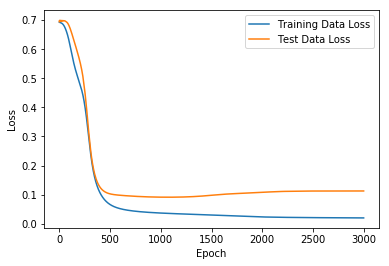

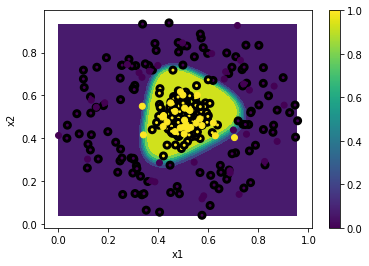

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,(loss), label='Training Data Loss')
plt.plot(epoch,(val_loss),label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(X_train[:,0],X_train[:,1],edgecolor="black",linewidth=3,c=y_train)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

Another reason for model overfitting can be the amount of test data.

In [25]:
testLoss = []
trainLoss = []
ratio = []

for splitRatio in np.arange(0.1,0.9,0.1):

    X_train = features[:int(data_len*splitRatio)]
    X_test = features[int(data_len*splitRatio):]
    y_train = labels[:int(data_len*splitRatio)]
    y_test = labels[int(data_len*splitRatio):]


    layers = []
    layers.append(keras.layers.Dense(3,input_dim = 2, activation="sigmoid"))
    layers.append(keras.layers.Dense(1, activation="sigmoid"))
    model = keras.Sequential(layers)

    model.compile(optimizer=keras.optimizers.Adam(lr=0.1), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])
    history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=int(X_train.shape[0]),epochs=3000, verbose=2)
   
    testLoss.append(history.history['loss'][-1])
    trainLoss.append(history.history['val_loss'][-1])
    ratio.append(splitRatio)



Train on 30 samples, validate on 270 samples
Epoch 1/3000
 - 1s - loss: 0.7448 - binary_accuracy: 0.4667 - categorical_accuracy: 1.0000 - val_loss: 0.7031 - val_binary_accuracy: 0.5037 - val_categorical_accuracy: 1.0000
Epoch 2/3000
 - 0s - loss: 0.7107 - binary_accuracy: 0.4667 - categorical_accuracy: 1.0000 - val_loss: 0.6936 - val_binary_accuracy: 0.4074 - val_categorical_accuracy: 1.0000
Epoch 3/3000
 - 0s - loss: 0.6904 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.7051 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 4/3000
 - 0s - loss: 0.6929 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.7212 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 5/3000
 - 0s - loss: 0.7029 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.7290 - val_binary_accuracy: 0.4963 - val_categorical_accuracy: 1.0000
Epoch 6/3000
 - 0s - loss: 0.7082 - binary_accuracy: 0.5333 - categorical_accura

Epoch 48/3000
 - 0s - loss: 0.6673 - binary_accuracy: 0.4667 - categorical_accuracy: 1.0000 - val_loss: 0.6913 - val_binary_accuracy: 0.4296 - val_categorical_accuracy: 1.0000
Epoch 49/3000
 - 0s - loss: 0.6664 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6910 - val_binary_accuracy: 0.4333 - val_categorical_accuracy: 1.0000
Epoch 50/3000
 - 0s - loss: 0.6653 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6908 - val_binary_accuracy: 0.4296 - val_categorical_accuracy: 1.0000
Epoch 51/3000
 - 0s - loss: 0.6642 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6908 - val_binary_accuracy: 0.4296 - val_categorical_accuracy: 1.0000
Epoch 52/3000
 - 0s - loss: 0.6629 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6909 - val_binary_accuracy: 0.4259 - val_categorical_accuracy: 1.0000
Epoch 53/3000
 - 0s - loss: 0.6617 - binary_accuracy: 0.4667 - categorical_accuracy: 1.0000 - val_loss: 0.6911 - val_bin

Epoch 95/3000
 - 0s - loss: 0.5931 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6435 - val_binary_accuracy: 0.5852 - val_categorical_accuracy: 1.0000
Epoch 96/3000
 - 0s - loss: 0.5910 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6417 - val_binary_accuracy: 0.5852 - val_categorical_accuracy: 1.0000
Epoch 97/3000
 - 0s - loss: 0.5888 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6399 - val_binary_accuracy: 0.5889 - val_categorical_accuracy: 1.0000
Epoch 98/3000
 - 0s - loss: 0.5866 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6380 - val_binary_accuracy: 0.6000 - val_categorical_accuracy: 1.0000
Epoch 99/3000
 - 0s - loss: 0.5844 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6361 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 100/3000
 - 0s - loss: 0.5820 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6341 - val_bi

Epoch 142/3000
 - 0s - loss: 0.3336 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3676 - val_binary_accuracy: 0.8852 - val_categorical_accuracy: 1.0000
Epoch 143/3000
 - 0s - loss: 0.3235 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3559 - val_binary_accuracy: 0.9111 - val_categorical_accuracy: 1.0000
Epoch 144/3000
 - 0s - loss: 0.3135 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.3443 - val_binary_accuracy: 0.9259 - val_categorical_accuracy: 1.0000
Epoch 145/3000
 - 0s - loss: 0.3036 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.3329 - val_binary_accuracy: 0.9296 - val_categorical_accuracy: 1.0000
Epoch 146/3000
 - 0s - loss: 0.2938 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.3218 - val_binary_accuracy: 0.9481 - val_categorical_accuracy: 1.0000
Epoch 147/3000
 - 0s - loss: 0.2841 - binary_accuracy: 0.9333 - categorical_accuracy: 1.0000 - val_loss: 0.3109 - v

Epoch 189/3000
 - 0s - loss: 0.0758 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1151 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 190/3000
 - 0s - loss: 0.0741 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1140 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 191/3000
 - 0s - loss: 0.0724 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1130 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 192/3000
 - 0s - loss: 0.0707 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1121 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 193/3000
 - 0s - loss: 0.0692 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1113 - val_binary_accuracy: 0.9704 - val_categorical_accuracy: 1.0000
Epoch 194/3000
 - 0s - loss: 0.0677 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - v

Epoch 236/3000
 - 0s - loss: 0.0337 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 237/3000
 - 0s - loss: 0.0333 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0972 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 238/3000
 - 0s - loss: 0.0329 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0971 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 239/3000
 - 0s - loss: 0.0325 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0970 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 240/3000
 - 0s - loss: 0.0321 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 241/3000
 - 0s - loss: 0.0317 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - v

Epoch 283/3000
 - 0s - loss: 0.0206 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 284/3000
 - 0s - loss: 0.0204 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 285/3000
 - 0s - loss: 0.0202 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 286/3000
 - 0s - loss: 0.0200 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 287/3000
 - 0s - loss: 0.0199 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 288/3000
 - 0s - loss: 0.0197 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0960 - v

Epoch 330/3000
 - 0s - loss: 0.0143 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 331/3000
 - 0s - loss: 0.0142 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 332/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 333/3000
 - 0s - loss: 0.0140 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 334/3000
 - 0s - loss: 0.0140 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 335/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0978 - v

Epoch 377/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 378/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 379/3000
 - 0s - loss: 0.0106 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 380/3000
 - 0s - loss: 0.0106 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 381/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1001 - val_binary_accuracy: 0.9630 - val_categorical_accuracy: 1.0000
Epoch 382/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - v

Epoch 424/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 425/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 426/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 427/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 428/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 429/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - v

Epoch 471/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1048 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 472/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 473/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 474/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 475/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 476/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1051 - v

Epoch 518/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 519/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 520/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 521/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1073 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 522/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1074 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 523/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1074 - v

Epoch 565/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1094 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 566/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1094 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 567/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1095 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 568/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1095 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 569/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1096 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 570/3000
 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1096 - v

Epoch 612/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1114 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 613/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1115 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 614/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1115 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 615/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1116 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 616/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1116 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 617/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1117 - v

Epoch 659/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1134 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 660/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1134 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 661/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 662/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 663/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 664/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1136 - v

Epoch 706/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1152 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 707/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1152 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 708/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1153 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 709/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1153 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 710/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1153 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 711/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - v

Epoch 753/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1169 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 754/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1169 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 755/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1169 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 756/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1170 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 757/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1170 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 758/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1170 - v

Epoch 800/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 801/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 802/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 803/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1186 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 804/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1186 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 805/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1186 - v

Epoch 847/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1199 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 848/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1200 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 849/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1200 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 850/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1200 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 851/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1201 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 852/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1201 - v

Epoch 894/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1213 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 895/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1213 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 896/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1214 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 897/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1214 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 898/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1214 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 899/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1215 - v

Epoch 941/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1226 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 942/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1226 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 943/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1227 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 944/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1227 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 945/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1227 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 946/3000
 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1227 - v

Epoch 988/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1238 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 989/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 990/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 991/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 992/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 993/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1240 - v

Epoch 1035/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1250 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1036/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1250 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1037/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1250 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1038/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1250 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1039/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1251 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1040/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1082/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1260 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1083/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1261 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1084/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1261 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1085/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1261 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1086/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1261 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1087/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1129/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1270 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1130/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1271 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1131/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1271 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1132/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1271 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1133/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1271 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1134/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1176/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1280 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1177/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1280 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1178/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1280 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1179/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1280 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1180/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1280 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1181/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1288 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1223/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1288 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1224/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1225/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1226/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1227/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_

Epoch 1269/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1296 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1270/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1271/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1272/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1273/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1274/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1315/3000
 - 0s - loss: 9.6442e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1304 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1316/3000
 - 0s - loss: 9.6297e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1304 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1317/3000
 - 0s - loss: 9.6152e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1304 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1318/3000
 - 0s - loss: 9.6006e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1305 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1319/3000
 - 0s - loss: 9.5862e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1305 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1320/3000
 - 0s - loss: 9.5718e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1361/3000
 - 0s - loss: 9.0063e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1311 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1362/3000
 - 0s - loss: 8.9931e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1311 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1363/3000
 - 0s - loss: 8.9799e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1311 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1364/3000
 - 0s - loss: 8.9668e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1312 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1365/3000
 - 0s - loss: 8.9536e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1312 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1366/3000
 - 0s - loss: 8.9407e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1407/3000
 - 0s - loss: 8.4261e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1318 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1408/3000
 - 0s - loss: 8.4141e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1318 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1409/3000
 - 0s - loss: 8.4020e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1318 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1410/3000
 - 0s - loss: 8.3901e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1318 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1411/3000
 - 0s - loss: 8.3781e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1318 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1412/3000
 - 0s - loss: 8.3663e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1453/3000
 - 0s - loss: 7.8968e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1324 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1454/3000
 - 0s - loss: 7.8856e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1324 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1455/3000
 - 0s - loss: 7.8748e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1324 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1456/3000
 - 0s - loss: 7.8638e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1324 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1457/3000
 - 0s - loss: 7.8529e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1325 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1458/3000
 - 0s - loss: 7.8420e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1499/3000
 - 0s - loss: 7.4124e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1330 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1500/3000
 - 0s - loss: 7.4023e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1330 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1501/3000
 - 0s - loss: 7.3923e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1330 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1502/3000
 - 0s - loss: 7.3822e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1330 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 1503/3000
 - 0s - loss: 7.3722e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1330 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1504/3000
 - 0s - loss: 7.3622e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1545/3000
 - 0s - loss: 6.9681e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1335 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1546/3000
 - 0s - loss: 6.9588e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1335 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1547/3000
 - 0s - loss: 6.9496e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1336 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1548/3000
 - 0s - loss: 6.9404e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1336 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1549/3000
 - 0s - loss: 6.9312e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1336 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1550/3000
 - 0s - loss: 6.9220e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1591/3000
 - 0s - loss: 6.5595e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1341 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1592/3000
 - 0s - loss: 6.5509e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1341 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1593/3000
 - 0s - loss: 6.5425e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1341 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1594/3000
 - 0s - loss: 6.5340e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1341 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1595/3000
 - 0s - loss: 6.5256e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1341 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1596/3000
 - 0s - loss: 6.5170e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1637/3000
 - 0s - loss: 6.1830e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1345 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1638/3000
 - 0s - loss: 6.1752e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1345 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1639/3000
 - 0s - loss: 6.1674e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1346 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1640/3000
 - 0s - loss: 6.1596e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1346 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1641/3000
 - 0s - loss: 6.1517e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1346 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1642/3000
 - 0s - loss: 6.1439e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1683/3000
 - 0s - loss: 5.8354e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1684/3000
 - 0s - loss: 5.8281e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1685/3000
 - 0s - loss: 5.8209e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1686/3000
 - 0s - loss: 5.8136e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1687/3000
 - 0s - loss: 5.8064e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1688/3000
 - 0s - loss: 5.7991e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1729/3000
 - 0s - loss: 5.5136e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1354 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1730/3000
 - 0s - loss: 5.5069e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1354 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1731/3000
 - 0s - loss: 5.5002e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1354 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1732/3000
 - 0s - loss: 5.4935e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1354 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1733/3000
 - 0s - loss: 5.4869e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1354 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1734/3000
 - 0s - loss: 5.4801e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1775/3000
 - 0s - loss: 5.2153e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1776/3000
 - 0s - loss: 5.2091e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1777/3000
 - 0s - loss: 5.2028e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1778/3000
 - 0s - loss: 5.1967e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1779/3000
 - 0s - loss: 5.1904e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1358 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1780/3000
 - 0s - loss: 5.1842e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1821/3000
 - 0s - loss: 4.9383e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1362 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1822/3000
 - 0s - loss: 4.9326e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1362 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1823/3000
 - 0s - loss: 4.9267e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1362 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1824/3000
 - 0s - loss: 4.9210e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1362 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1825/3000
 - 0s - loss: 4.9152e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1362 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1826/3000
 - 0s - loss: 4.9095e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1867/3000
 - 0s - loss: 4.6808e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1365 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1868/3000
 - 0s - loss: 4.6753e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1869/3000
 - 0s - loss: 4.6699e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1870/3000
 - 0s - loss: 4.6644e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1871/3000
 - 0s - loss: 4.6592e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1872/3000
 - 0s - loss: 4.6538e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1913/3000
 - 0s - loss: 4.4407e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1369 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1914/3000
 - 0s - loss: 4.4356e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1369 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1915/3000
 - 0s - loss: 4.4306e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1369 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1916/3000
 - 0s - loss: 4.4256e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1369 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1917/3000
 - 0s - loss: 4.4206e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1369 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1918/3000
 - 0s - loss: 4.4156e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1959/3000
 - 0s - loss: 4.2167e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1372 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1960/3000
 - 0s - loss: 4.2120e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1372 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1961/3000
 - 0s - loss: 4.2074e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1372 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1962/3000
 - 0s - loss: 4.2026e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1372 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1963/3000
 - 0s - loss: 4.1979e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1372 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 1964/3000
 - 0s - loss: 4.1933e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2005/3000
 - 0s - loss: 4.0075e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1375 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2006/3000
 - 0s - loss: 4.0031e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1375 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2007/3000
 - 0s - loss: 3.9988e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1375 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2008/3000
 - 0s - loss: 3.9943e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1375 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2009/3000
 - 0s - loss: 3.9900e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1375 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2010/3000
 - 0s - loss: 3.9856e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2051/3000
 - 0s - loss: 3.8118e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1378 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2052/3000
 - 0s - loss: 3.8077e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1378 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2053/3000
 - 0s - loss: 3.8036e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1378 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2054/3000
 - 0s - loss: 3.7994e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1378 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2055/3000
 - 0s - loss: 3.7954e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1378 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2056/3000
 - 0s - loss: 3.7913e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2097/3000
 - 0s - loss: 3.6284e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2098/3000
 - 0s - loss: 3.6246e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2099/3000
 - 0s - loss: 3.6209e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2100/3000
 - 0s - loss: 3.6169e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2101/3000
 - 0s - loss: 3.6131e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2102/3000
 - 0s - loss: 3.6092e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2143/3000
 - 0s - loss: 3.4567e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2144/3000
 - 0s - loss: 3.4530e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2145/3000
 - 0s - loss: 3.4494e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2146/3000
 - 0s - loss: 3.4458e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2147/3000
 - 0s - loss: 3.4422e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2148/3000
 - 0s - loss: 3.4386e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2189/3000
 - 0s - loss: 3.2952e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1386 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2190/3000
 - 0s - loss: 3.2919e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1386 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2191/3000
 - 0s - loss: 3.2885e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1386 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2192/3000
 - 0s - loss: 3.2851e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1386 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2193/3000
 - 0s - loss: 3.2817e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1386 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2194/3000
 - 0s - loss: 3.2783e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2235/3000
 - 0s - loss: 3.1437e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1388 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2236/3000
 - 0s - loss: 3.1404e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1388 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2237/3000
 - 0s - loss: 3.1373e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1388 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2238/3000
 - 0s - loss: 3.1340e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1388 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2239/3000
 - 0s - loss: 3.1309e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1388 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2240/3000
 - 0s - loss: 3.1277e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2281/3000
 - 0s - loss: 3.0010e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1390 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2282/3000
 - 0s - loss: 2.9980e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1390 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2283/3000
 - 0s - loss: 2.9950e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1391 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2284/3000
 - 0s - loss: 2.9921e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1391 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2285/3000
 - 0s - loss: 2.9890e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1391 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2286/3000
 - 0s - loss: 2.9860e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2327/3000
 - 0s - loss: 2.8668e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1393 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2328/3000
 - 0s - loss: 2.8639e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1393 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2329/3000
 - 0s - loss: 2.8611e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1393 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2330/3000
 - 0s - loss: 2.8582e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1393 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2331/3000
 - 0s - loss: 2.8554e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1393 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2332/3000
 - 0s - loss: 2.8526e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2373/3000
 - 0s - loss: 2.7402e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1395 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2374/3000
 - 0s - loss: 2.7376e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1395 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2375/3000
 - 0s - loss: 2.7348e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1395 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2376/3000
 - 0s - loss: 2.7322e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1395 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2377/3000
 - 0s - loss: 2.7295e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1395 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2378/3000
 - 0s - loss: 2.7268e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2419/3000
 - 0s - loss: 2.6208e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1397 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2420/3000
 - 0s - loss: 2.6183e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1397 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2421/3000
 - 0s - loss: 2.6158e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1397 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2422/3000
 - 0s - loss: 2.6132e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1397 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2423/3000
 - 0s - loss: 2.6108e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1397 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2424/3000
 - 0s - loss: 2.6082e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.5105e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2465/3000
 - 0s - loss: 2.5081e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2466/3000
 - 0s - loss: 2.5057e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2467/3000
 - 0s - loss: 2.5033e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2468/3000
 - 0s - loss: 2.5010e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2469/3000
 - 0s - loss: 2.4986e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2510/3000
 - 0s - loss: 2.4038e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9519 - val_categorical_accuracy: 1.0000
Epoch 2511/3000
 - 0s - loss: 2.4017e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2512/3000
 - 0s - loss: 2.3994e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2513/3000
 - 0s - loss: 2.3971e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2514/3000
 - 0s - loss: 2.3948e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2515/3000
 - 0s - loss: 2.3927e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2556/3000
 - 0s - loss: 2.3030e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1403 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2557/3000
 - 0s - loss: 2.3008e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1403 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2558/3000
 - 0s - loss: 2.2988e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1403 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2559/3000
 - 0s - loss: 2.2966e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1403 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2560/3000
 - 0s - loss: 2.2945e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1404 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2561/3000
 - 0s - loss: 2.2924e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2602/3000
 - 0s - loss: 2.2076e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1405 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2603/3000
 - 0s - loss: 2.2056e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1405 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2604/3000
 - 0s - loss: 2.2035e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1405 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2605/3000
 - 0s - loss: 2.2016e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1406 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2606/3000
 - 0s - loss: 2.1995e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1406 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2607/3000
 - 0s - loss: 2.1976e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2648/3000
 - 0s - loss: 2.1173e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1407 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2649/3000
 - 0s - loss: 2.1153e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1408 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2650/3000
 - 0s - loss: 2.1134e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1408 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2651/3000
 - 0s - loss: 2.1115e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1408 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2652/3000
 - 0s - loss: 2.1097e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1408 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2653/3000
 - 0s - loss: 2.1077e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2694/3000
 - 0s - loss: 2.0316e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1410 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2695/3000
 - 0s - loss: 2.0298e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1410 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2696/3000
 - 0s - loss: 2.0279e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1410 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2697/3000
 - 0s - loss: 2.0262e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1410 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2698/3000
 - 0s - loss: 2.0244e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1410 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2699/3000
 - 0s - loss: 2.0226e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 1.9522e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1412 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2740/3000
 - 0s - loss: 1.9503e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1412 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2741/3000
 - 0s - loss: 1.9487e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1412 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2742/3000
 - 0s - loss: 1.9470e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1412 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2743/3000
 - 0s - loss: 1.9453e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1412 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2744/3000
 - 0s - loss: 1.9436e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2785/3000
 - 0s - loss: 1.8749e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1414 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2786/3000
 - 0s - loss: 1.8733e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1414 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2787/3000
 - 0s - loss: 1.8717e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1414 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2788/3000
 - 0s - loss: 1.8701e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1414 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2789/3000
 - 0s - loss: 1.8684e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1414 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2790/3000
 - 0s - loss: 1.8668e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2831/3000
 - 0s - loss: 1.8016e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1416 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2832/3000
 - 0s - loss: 1.8000e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1416 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2833/3000
 - 0s - loss: 1.7985e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1416 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2834/3000
 - 0s - loss: 1.7971e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1416 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2835/3000
 - 0s - loss: 1.7954e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1416 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2836/3000
 - 0s - loss: 1.7939e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2877/3000
 - 0s - loss: 1.7320e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1418 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2878/3000
 - 0s - loss: 1.7305e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1418 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2879/3000
 - 0s - loss: 1.7291e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1418 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2880/3000
 - 0s - loss: 1.7276e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1418 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2881/3000
 - 0s - loss: 1.7262e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1418 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2882/3000
 - 0s - loss: 1.7246e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2923/3000
 - 0s - loss: 1.6658e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1420 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2924/3000
 - 0s - loss: 1.6644e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1420 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2925/3000
 - 0s - loss: 1.6630e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1420 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2926/3000
 - 0s - loss: 1.6617e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1420 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2927/3000
 - 0s - loss: 1.6603e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1420 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2928/3000
 - 0s - loss: 1.6588e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2969/3000
 - 0s - loss: 1.6028e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2970/3000
 - 0s - loss: 1.6015e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2971/3000
 - 0s - loss: 1.6002e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2972/3000
 - 0s - loss: 1.5987e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2973/3000
 - 0s - loss: 1.5974e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9556 - val_categorical_accuracy: 1.0000
Epoch 2974/3000
 - 0s - loss: 1.5962e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 15/3000
 - 0s - loss: 0.6867 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6995 - val_binary_accuracy: 0.4917 - val_categorical_accuracy: 1.0000
Epoch 16/3000
 - 0s - loss: 0.6867 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.7003 - val_binary_accuracy: 0.4917 - val_categorical_accuracy: 1.0000
Epoch 17/3000
 - 0s - loss: 0.6866 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6994 - val_binary_accuracy: 0.4917 - val_categorical_accuracy: 1.0000
Epoch 18/3000
 - 0s - loss: 0.6859 - binary_accuracy: 0.5333 - categorical_accuracy: 1.0000 - val_loss: 0.6975 - val_binary_accuracy: 0.4917 - val_categorical_accuracy: 1.0000
Epoch 19/3000
 - 0s - loss: 0.6851 - binary_accuracy: 0.5667 - categorical_accuracy: 1.0000 - val_loss: 0.6955 - val_binary_accuracy: 0.5292 - val_categorical_accuracy: 1.0000
Epoch 20/3000
 - 0s - loss: 0.6845 - binary_accuracy: 0.5667 - categorical_accuracy: 1.0000 - val_loss: 0.6941 - val_bin

Epoch 62/3000
 - 0s - loss: 0.5850 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6427 - val_binary_accuracy: 0.6625 - val_categorical_accuracy: 1.0000
Epoch 63/3000
 - 0s - loss: 0.5819 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6411 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 64/3000
 - 0s - loss: 0.5788 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6397 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 65/3000
 - 0s - loss: 0.5756 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6382 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 66/3000
 - 0s - loss: 0.5724 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6364 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 67/3000
 - 0s - loss: 0.5690 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6343 - val_bin

Epoch 109/3000
 - 0s - loss: 0.2332 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.3299 - val_binary_accuracy: 0.8792 - val_categorical_accuracy: 1.0000
Epoch 110/3000
 - 0s - loss: 0.2259 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.3206 - val_binary_accuracy: 0.8792 - val_categorical_accuracy: 1.0000
Epoch 111/3000
 - 0s - loss: 0.2187 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.3111 - val_binary_accuracy: 0.8833 - val_categorical_accuracy: 1.0000
Epoch 112/3000
 - 0s - loss: 0.2118 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.3011 - val_binary_accuracy: 0.8875 - val_categorical_accuracy: 1.0000
Epoch 113/3000
 - 0s - loss: 0.2052 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.2910 - val_binary_accuracy: 0.8917 - val_categorical_accuracy: 1.0000
Epoch 114/3000
 - 0s - loss: 0.1987 - binary_accuracy: 0.9667 - categorical_accuracy: 1.0000 - val_loss: 0.2807 - v

Epoch 156/3000
 - 0s - loss: 0.0605 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0862 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 157/3000
 - 0s - loss: 0.0590 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0848 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 158/3000
 - 0s - loss: 0.0575 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0835 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 159/3000
 - 0s - loss: 0.0561 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 160/3000
 - 0s - loss: 0.0547 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0812 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 161/3000
 - 0s - loss: 0.0534 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - v

Epoch 203/3000
 - 0s - loss: 0.0258 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 204/3000
 - 0s - loss: 0.0255 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0683 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 205/3000
 - 0s - loss: 0.0252 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 206/3000
 - 0s - loss: 0.0250 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 207/3000
 - 0s - loss: 0.0247 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 208/3000
 - 0s - loss: 0.0245 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - v

Epoch 250/3000
 - 0s - loss: 0.0172 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 251/3000
 - 0s - loss: 0.0170 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0624 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 252/3000
 - 0s - loss: 0.0169 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0623 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 253/3000
 - 0s - loss: 0.0168 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 254/3000
 - 0s - loss: 0.0167 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_binary_accuracy: 0.9792 - val_categorical_accuracy: 1.0000
Epoch 255/3000
 - 0s - loss: 0.0166 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - v

Epoch 297/3000
 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 298/3000
 - 0s - loss: 0.0127 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 299/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 300/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 301/3000
 - 0s - loss: 0.0125 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 302/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - v

Epoch 344/3000
 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 345/3000
 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 346/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 347/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 348/3000
 - 0s - loss: 0.0098 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 349/3000
 - 0s - loss: 0.0098 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - v

Epoch 391/3000
 - 0s - loss: 0.0082 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 392/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 393/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 394/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 395/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 396/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0620 - v

Epoch 438/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 439/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 440/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0632 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 441/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0632 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 442/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0632 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 443/3000
 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - v

Epoch 485/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 486/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 487/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 488/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 489/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 490/3000
 - 0s - loss: 0.0057 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - v

Epoch 532/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 533/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 534/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 535/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 536/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 537/3000
 - 0s - loss: 0.0049 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - v

Epoch 579/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 580/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 581/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 582/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 583/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 584/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - v

Epoch 626/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 627/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 628/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 629/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 630/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0699 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 631/3000
 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0699 - v

Epoch 673/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0715 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 674/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0715 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 675/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 676/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 677/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 678/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0717 - v

Epoch 720/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 721/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 722/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 723/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0734 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 724/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0734 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 725/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0734 - v

Epoch 767/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0750 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 768/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0750 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 769/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 770/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 771/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0752 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 772/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0752 - v

Epoch 814/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0767 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 815/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 816/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 817/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 818/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0769 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 819/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0769 - v

Epoch 861/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 862/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 863/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 864/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 865/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0786 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 866/3000
 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0786 - v

Epoch 908/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 909/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 910/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 911/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 912/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0803 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 913/3000
 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0803 - v

Epoch 955/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0818 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 956/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0818 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 957/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0818 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 958/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0819 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 959/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0819 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 960/3000
 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0819 - v

Epoch 1002/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1003/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1004/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1005/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0835 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1006/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0835 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1007/3000
 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1049/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0849 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1050/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0850 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1051/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0850 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1052/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0850 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1053/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0851 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1054/3000
 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1096/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0865 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1097/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0865 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1098/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0865 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1099/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0866 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1100/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0866 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1101/3000
 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1143/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0880 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1144/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0880 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1145/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0881 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1146/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0881 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1147/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0881 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1148/3000
 - 0s - loss: 0.0014 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1190/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0895 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1191/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0895 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1192/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0895 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1193/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0896 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1194/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0896 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1195/3000
 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.08

 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0909 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1237/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0909 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1238/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1239/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1240/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1241/3000
 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_

Epoch 1283/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0923 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1284/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0923 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1285/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0924 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1286/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0924 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1287/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0924 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1288/3000
 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1330/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0937 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1331/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0937 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1332/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0938 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1333/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0938 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1334/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0938 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1335/3000
 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 1376/3000
 - 0s - loss: 9.7661e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0950 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1377/3000
 - 0s - loss: 9.7530e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0951 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1378/3000
 - 0s - loss: 9.7400e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0951 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1379/3000
 - 0s - loss: 9.7270e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0951 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1380/3000
 - 0s - loss: 9.7140e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1381/3000
 - 0s - loss: 9.7011e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1422/3000
 - 0s - loss: 9.1900e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1423/3000
 - 0s - loss: 9.1779e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1424/3000
 - 0s - loss: 9.1660e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1425/3000
 - 0s - loss: 9.1541e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0964 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1426/3000
 - 0s - loss: 9.1421e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1427/3000
 - 0s - loss: 9.1303e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1468/3000
 - 0s - loss: 8.6612e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0976 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1469/3000
 - 0s - loss: 8.6502e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1470/3000
 - 0s - loss: 8.6393e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1471/3000
 - 0s - loss: 8.6283e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1472/3000
 - 0s - loss: 8.6174e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1473/3000
 - 0s - loss: 8.6064e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1514/3000
 - 0s - loss: 8.1749e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1515/3000
 - 0s - loss: 8.1647e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1516/3000
 - 0s - loss: 8.1546e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1517/3000
 - 0s - loss: 8.1446e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1518/3000
 - 0s - loss: 8.1345e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1519/3000
 - 0s - loss: 8.1244e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1560/3000
 - 0s - loss: 7.7264e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1001 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1561/3000
 - 0s - loss: 7.7171e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1562/3000
 - 0s - loss: 7.7077e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1563/3000
 - 0s - loss: 7.6983e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1564/3000
 - 0s - loss: 7.6891e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1002 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1565/3000
 - 0s - loss: 7.6798e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1606/3000
 - 0s - loss: 7.3119e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1607/3000
 - 0s - loss: 7.3032e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1608/3000
 - 0s - loss: 7.2946e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1609/3000
 - 0s - loss: 7.2860e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1610/3000
 - 0s - loss: 7.2774e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1015 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1611/3000
 - 0s - loss: 7.2688e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1652/3000
 - 0s - loss: 6.9281e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1653/3000
 - 0s - loss: 6.9200e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1654/3000
 - 0s - loss: 6.9121e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1655/3000
 - 0s - loss: 6.9041e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1656/3000
 - 0s - loss: 6.8961e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1657/3000
 - 0s - loss: 6.8881e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1698/3000
 - 0s - loss: 6.5720e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1037 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1699/3000
 - 0s - loss: 6.5645e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1037 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1700/3000
 - 0s - loss: 6.5570e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1701/3000
 - 0s - loss: 6.5496e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1702/3000
 - 0s - loss: 6.5422e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1703/3000
 - 0s - loss: 6.5348e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1744/3000
 - 0s - loss: 6.2409e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1745/3000
 - 0s - loss: 6.2339e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1746/3000
 - 0s - loss: 6.2270e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1747/3000
 - 0s - loss: 6.2201e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1748/3000
 - 0s - loss: 6.2132e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1050 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1749/3000
 - 0s - loss: 6.2063e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1790/3000
 - 0s - loss: 5.9326e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1791/3000
 - 0s - loss: 5.9261e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1792/3000
 - 0s - loss: 5.9197e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1793/3000
 - 0s - loss: 5.9132e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1794/3000
 - 0s - loss: 5.9068e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1795/3000
 - 0s - loss: 5.9004e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1836/3000
 - 0s - loss: 5.6449e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1837/3000
 - 0s - loss: 5.6390e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1071 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1838/3000
 - 0s - loss: 5.6329e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1839/3000
 - 0s - loss: 5.6269e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1840/3000
 - 0s - loss: 5.6208e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1072 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1841/3000
 - 0s - loss: 5.6149e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1882/3000
 - 0s - loss: 5.3762e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1082 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1883/3000
 - 0s - loss: 5.3706e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1082 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1884/3000
 - 0s - loss: 5.3650e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1083 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1885/3000
 - 0s - loss: 5.3593e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1083 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1886/3000
 - 0s - loss: 5.3537e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1083 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1887/3000
 - 0s - loss: 5.3481e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1928/3000
 - 0s - loss: 5.1249e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1093 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1929/3000
 - 0s - loss: 5.1196e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1093 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1930/3000
 - 0s - loss: 5.1142e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1093 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1931/3000
 - 0s - loss: 5.1089e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1094 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1932/3000
 - 0s - loss: 5.1037e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1094 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1933/3000
 - 0s - loss: 5.0984e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 1974/3000
 - 0s - loss: 4.8891e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1103 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1975/3000
 - 0s - loss: 4.8842e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1976/3000
 - 0s - loss: 4.8792e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1977/3000
 - 0s - loss: 4.8743e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1978/3000
 - 0s - loss: 4.8693e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 1979/3000
 - 0s - loss: 4.8644e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2020/3000
 - 0s - loss: 4.6680e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1114 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2021/3000
 - 0s - loss: 4.6634e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1114 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2022/3000
 - 0s - loss: 4.6588e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1114 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2023/3000
 - 0s - loss: 4.6541e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1115 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2024/3000
 - 0s - loss: 4.6495e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1115 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2025/3000
 - 0s - loss: 4.6449e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2066/3000
 - 0s - loss: 4.4603e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2067/3000
 - 0s - loss: 4.4559e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2068/3000
 - 0s - loss: 4.4516e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2069/3000
 - 0s - loss: 4.4471e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2070/3000
 - 0s - loss: 4.4428e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1125 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2071/3000
 - 0s - loss: 4.4385e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2112/3000
 - 0s - loss: 4.2648e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1134 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2113/3000
 - 0s - loss: 4.2607e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2114/3000
 - 0s - loss: 4.2566e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2115/3000
 - 0s - loss: 4.2525e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2116/3000
 - 0s - loss: 4.2484e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2117/3000
 - 0s - loss: 4.2443e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2158/3000
 - 0s - loss: 4.0807e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1144 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2159/3000
 - 0s - loss: 4.0769e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2160/3000
 - 0s - loss: 4.0730e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2161/3000
 - 0s - loss: 4.0691e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2162/3000
 - 0s - loss: 4.0652e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2163/3000
 - 0s - loss: 4.0614e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.9108e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2204/3000
 - 0s - loss: 3.9071e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2205/3000
 - 0s - loss: 3.9034e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1154 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2206/3000
 - 0s - loss: 3.8998e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1155 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2207/3000
 - 0s - loss: 3.8961e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1155 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2208/3000
 - 0s - loss: 3.8925e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2249/3000
 - 0s - loss: 3.7467e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1164 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2250/3000
 - 0s - loss: 3.7433e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1164 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2251/3000
 - 0s - loss: 3.7398e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1164 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2252/3000
 - 0s - loss: 3.7363e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1164 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2253/3000
 - 0s - loss: 3.7328e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1164 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2254/3000
 - 0s - loss: 3.7294e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2295/3000
 - 0s - loss: 3.5916e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1173 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2296/3000
 - 0s - loss: 3.5883e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1173 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2297/3000
 - 0s - loss: 3.5851e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1174 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2298/3000
 - 0s - loss: 3.5818e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1174 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2299/3000
 - 0s - loss: 3.5786e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1174 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2300/3000
 - 0s - loss: 3.5753e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.4480e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1182 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2341/3000
 - 0s - loss: 3.4449e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1183 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2342/3000
 - 0s - loss: 3.4419e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1183 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2343/3000
 - 0s - loss: 3.4388e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1183 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2344/3000
 - 0s - loss: 3.4356e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1183 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2345/3000
 - 0s - loss: 3.4326e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2386/3000
 - 0s - loss: 3.3090e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1192 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2387/3000
 - 0s - loss: 3.3060e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1192 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2388/3000
 - 0s - loss: 3.3031e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1192 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2389/3000
 - 0s - loss: 3.3002e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1192 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2390/3000
 - 0s - loss: 3.2973e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1193 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2391/3000
 - 0s - loss: 3.2944e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 3.1800e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1201 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2432/3000
 - 0s - loss: 3.1772e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1201 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2433/3000
 - 0s - loss: 3.1744e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1201 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2434/3000
 - 0s - loss: 3.1716e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1201 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2435/3000
 - 0s - loss: 3.1688e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1202 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2436/3000
 - 0s - loss: 3.1661e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2477/3000
 - 0s - loss: 3.0548e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2478/3000
 - 0s - loss: 3.0522e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2479/3000
 - 0s - loss: 3.0496e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2480/3000
 - 0s - loss: 3.0469e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2481/3000
 - 0s - loss: 3.0443e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1211 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2482/3000
 - 0s - loss: 3.0417e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2523/3000
 - 0s - loss: 2.9360e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1219 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2524/3000
 - 0s - loss: 2.9336e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1219 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2525/3000
 - 0s - loss: 2.9310e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1219 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2526/3000
 - 0s - loss: 2.9286e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1219 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2527/3000
 - 0s - loss: 2.9261e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1220 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2528/3000
 - 0s - loss: 2.9235e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2569/3000
 - 0s - loss: 2.8232e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1228 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2570/3000
 - 0s - loss: 2.8208e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1228 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2571/3000
 - 0s - loss: 2.8184e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1228 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2572/3000
 - 0s - loss: 2.8161e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1228 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2573/3000
 - 0s - loss: 2.8137e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1228 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2574/3000
 - 0s - loss: 2.8113e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2615/3000
 - 0s - loss: 2.7158e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1236 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2616/3000
 - 0s - loss: 2.7135e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1236 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2617/3000
 - 0s - loss: 2.7113e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1237 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2618/3000
 - 0s - loss: 2.7090e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1237 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2619/3000
 - 0s - loss: 2.7067e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1237 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2620/3000
 - 0s - loss: 2.7045e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2661/3000
 - 0s - loss: 2.6137e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1245 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2662/3000
 - 0s - loss: 2.6116e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1245 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2663/3000
 - 0s - loss: 2.6094e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1245 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2664/3000
 - 0s - loss: 2.6073e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1245 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2665/3000
 - 0s - loss: 2.6050e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1246 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2666/3000
 - 0s - loss: 2.6029e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2707/3000
 - 0s - loss: 2.5164e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1253 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2708/3000
 - 0s - loss: 2.5143e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1254 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2709/3000
 - 0s - loss: 2.5123e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1254 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2710/3000
 - 0s - loss: 2.5103e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1254 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2711/3000
 - 0s - loss: 2.5082e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1254 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2712/3000
 - 0s - loss: 2.5062e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

 - 0s - loss: 2.4257e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1262 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2753/3000
 - 0s - loss: 2.4237e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1262 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2754/3000
 - 0s - loss: 2.4218e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1262 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2755/3000
 - 0s - loss: 2.4198e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1262 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2756/3000
 - 0s - loss: 2.4179e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1262 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2757/3000
 - 0s - loss: 2.4159e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_lo

Epoch 2798/3000
 - 0s - loss: 2.3372e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1270 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2799/3000
 - 0s - loss: 2.3353e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1270 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2800/3000
 - 0s - loss: 2.3334e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1270 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2801/3000
 - 0s - loss: 2.3316e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1270 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2802/3000
 - 0s - loss: 2.3297e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1271 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2803/3000
 - 0s - loss: 2.3279e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2844/3000
 - 0s - loss: 2.2527e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1278 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2845/3000
 - 0s - loss: 2.2510e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1278 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2846/3000
 - 0s - loss: 2.2492e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1278 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2847/3000
 - 0s - loss: 2.2474e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1279 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2848/3000
 - 0s - loss: 2.2457e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1279 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2849/3000
 - 0s - loss: 2.2439e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2890/3000
 - 0s - loss: 2.1721e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1286 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2891/3000
 - 0s - loss: 2.1704e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1286 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2892/3000
 - 0s - loss: 2.1688e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1287 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2893/3000
 - 0s - loss: 2.1670e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1287 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2894/3000
 - 0s - loss: 2.1654e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1287 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2895/3000
 - 0s - loss: 2.1637e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2936/3000
 - 0s - loss: 2.0951e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1294 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2937/3000
 - 0s - loss: 2.0934e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1294 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2938/3000
 - 0s - loss: 2.0918e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1295 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2939/3000
 - 0s - loss: 2.0902e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1295 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2940/3000
 - 0s - loss: 2.0886e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1295 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2941/3000
 - 0s - loss: 2.0870e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 2982/3000
 - 0s - loss: 2.0215e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1302 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2983/3000
 - 0s - loss: 2.0200e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1302 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2984/3000
 - 0s - loss: 2.0184e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1302 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2985/3000
 - 0s - loss: 2.0168e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1303 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2986/3000
 - 0s - loss: 2.0153e-04 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1303 - val_binary_accuracy: 0.9708 - val_categorical_accuracy: 1.0000
Epoch 2987/3000
 - 0s - loss: 2.0137e-04 - binary_accuracy: 1.0000 - categorical_accuracy:

Epoch 28/3000
 - 0s - loss: 0.6937 - binary_accuracy: 0.4778 - categorical_accuracy: 1.0000 - val_loss: 0.6932 - val_binary_accuracy: 0.5095 - val_categorical_accuracy: 1.0000
Epoch 29/3000
 - 0s - loss: 0.6936 - binary_accuracy: 0.4778 - categorical_accuracy: 1.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.5095 - val_categorical_accuracy: 1.0000
Epoch 30/3000
 - 0s - loss: 0.6932 - binary_accuracy: 0.4778 - categorical_accuracy: 1.0000 - val_loss: 0.6929 - val_binary_accuracy: 0.5095 - val_categorical_accuracy: 1.0000
Epoch 31/3000
 - 0s - loss: 0.6926 - binary_accuracy: 0.4778 - categorical_accuracy: 1.0000 - val_loss: 0.6927 - val_binary_accuracy: 0.4905 - val_categorical_accuracy: 1.0000
Epoch 32/3000
 - 0s - loss: 0.6918 - binary_accuracy: 0.4667 - categorical_accuracy: 1.0000 - val_loss: 0.6926 - val_binary_accuracy: 0.3762 - val_categorical_accuracy: 1.0000
Epoch 33/3000
 - 0s - loss: 0.6911 - binary_accuracy: 0.3556 - categorical_accuracy: 1.0000 - val_loss: 0.6927 - val_bin

Epoch 75/3000
 - 0s - loss: 0.6807 - binary_accuracy: 0.6667 - categorical_accuracy: 1.0000 - val_loss: 0.6915 - val_binary_accuracy: 0.6381 - val_categorical_accuracy: 1.0000
Epoch 76/3000
 - 0s - loss: 0.6802 - binary_accuracy: 0.6778 - categorical_accuracy: 1.0000 - val_loss: 0.6913 - val_binary_accuracy: 0.6429 - val_categorical_accuracy: 1.0000
Epoch 77/3000
 - 0s - loss: 0.6798 - binary_accuracy: 0.6778 - categorical_accuracy: 1.0000 - val_loss: 0.6910 - val_binary_accuracy: 0.6429 - val_categorical_accuracy: 1.0000
Epoch 78/3000
 - 0s - loss: 0.6793 - binary_accuracy: 0.6889 - categorical_accuracy: 1.0000 - val_loss: 0.6907 - val_binary_accuracy: 0.6524 - val_categorical_accuracy: 1.0000
Epoch 79/3000
 - 0s - loss: 0.6788 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6904 - val_binary_accuracy: 0.6476 - val_categorical_accuracy: 1.0000
Epoch 80/3000
 - 0s - loss: 0.6783 - binary_accuracy: 0.7000 - categorical_accuracy: 1.0000 - val_loss: 0.6901 - val_bin

Epoch 122/3000
 - 0s - loss: 0.6298 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6689 - val_binary_accuracy: 0.6714 - val_categorical_accuracy: 1.0000
Epoch 123/3000
 - 0s - loss: 0.6281 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6680 - val_binary_accuracy: 0.6714 - val_categorical_accuracy: 1.0000
Epoch 124/3000
 - 0s - loss: 0.6264 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6671 - val_binary_accuracy: 0.6714 - val_categorical_accuracy: 1.0000
Epoch 125/3000
 - 0s - loss: 0.6247 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6662 - val_binary_accuracy: 0.6714 - val_categorical_accuracy: 1.0000
Epoch 126/3000
 - 0s - loss: 0.6230 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6653 - val_binary_accuracy: 0.6714 - val_categorical_accuracy: 1.0000
Epoch 127/3000
 - 0s - loss: 0.6213 - binary_accuracy: 0.7444 - categorical_accuracy: 1.0000 - val_loss: 0.6644 - v

Epoch 169/3000
 - 0s - loss: 0.5675 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6269 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 170/3000
 - 0s - loss: 0.5665 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6260 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 171/3000
 - 0s - loss: 0.5656 - binary_accuracy: 0.7222 - categorical_accuracy: 1.0000 - val_loss: 0.6251 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 172/3000
 - 0s - loss: 0.5646 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6241 - val_binary_accuracy: 0.6571 - val_categorical_accuracy: 1.0000
Epoch 173/3000
 - 0s - loss: 0.5637 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6231 - val_binary_accuracy: 0.6524 - val_categorical_accuracy: 1.0000
Epoch 174/3000
 - 0s - loss: 0.5627 - binary_accuracy: 0.7333 - categorical_accuracy: 1.0000 - val_loss: 0.6221 - v

Epoch 216/3000
 - 0s - loss: 0.4955 - binary_accuracy: 0.7778 - categorical_accuracy: 1.0000 - val_loss: 0.5316 - val_binary_accuracy: 0.7667 - val_categorical_accuracy: 1.0000
Epoch 217/3000
 - 0s - loss: 0.4932 - binary_accuracy: 0.7778 - categorical_accuracy: 1.0000 - val_loss: 0.5285 - val_binary_accuracy: 0.7762 - val_categorical_accuracy: 1.0000
Epoch 218/3000
 - 0s - loss: 0.4909 - binary_accuracy: 0.7778 - categorical_accuracy: 1.0000 - val_loss: 0.5254 - val_binary_accuracy: 0.7762 - val_categorical_accuracy: 1.0000
Epoch 219/3000
 - 0s - loss: 0.4886 - binary_accuracy: 0.7778 - categorical_accuracy: 1.0000 - val_loss: 0.5224 - val_binary_accuracy: 0.7762 - val_categorical_accuracy: 1.0000
Epoch 220/3000
 - 0s - loss: 0.4863 - binary_accuracy: 0.7778 - categorical_accuracy: 1.0000 - val_loss: 0.5193 - val_binary_accuracy: 0.7810 - val_categorical_accuracy: 1.0000
Epoch 221/3000
 - 0s - loss: 0.4839 - binary_accuracy: 0.7778 - categorical_accuracy: 1.0000 - val_loss: 0.5161 - v

Epoch 263/3000
 - 0s - loss: 0.3548 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3615 - val_binary_accuracy: 0.8714 - val_categorical_accuracy: 1.0000
Epoch 264/3000
 - 0s - loss: 0.3511 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3571 - val_binary_accuracy: 0.8762 - val_categorical_accuracy: 1.0000
Epoch 265/3000
 - 0s - loss: 0.3474 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3526 - val_binary_accuracy: 0.8762 - val_categorical_accuracy: 1.0000
Epoch 266/3000
 - 0s - loss: 0.3436 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3480 - val_binary_accuracy: 0.8857 - val_categorical_accuracy: 1.0000
Epoch 267/3000
 - 0s - loss: 0.3398 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3434 - val_binary_accuracy: 0.8857 - val_categorical_accuracy: 1.0000
Epoch 268/3000
 - 0s - loss: 0.3358 - binary_accuracy: 0.8778 - categorical_accuracy: 1.0000 - val_loss: 0.3387 - v

Epoch 310/3000
 - 0s - loss: 0.1305 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1418 - val_binary_accuracy: 0.9714 - val_categorical_accuracy: 1.0000
Epoch 311/3000
 - 0s - loss: 0.1276 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1394 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 312/3000
 - 0s - loss: 0.1248 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1372 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 313/3000
 - 0s - loss: 0.1221 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1351 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 314/3000
 - 0s - loss: 0.1196 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1331 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 315/3000
 - 0s - loss: 0.1171 - binary_accuracy: 0.9556 - categorical_accuracy: 1.0000 - val_loss: 0.1312 - v

Epoch 357/3000
 - 0s - loss: 0.0607 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_binary_accuracy: 0.9810 - val_categorical_accuracy: 1.0000
Epoch 358/3000
 - 0s - loss: 0.0601 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0955 - val_binary_accuracy: 0.9810 - val_categorical_accuracy: 1.0000
Epoch 359/3000
 - 0s - loss: 0.0594 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0952 - val_binary_accuracy: 0.9762 - val_categorical_accuracy: 1.0000
Epoch 360/3000
 - 0s - loss: 0.0588 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0950 - val_binary_accuracy: 0.9762 - val_categorical_accuracy: 1.0000
Epoch 361/3000
 - 0s - loss: 0.0582 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0947 - val_binary_accuracy: 0.9762 - val_categorical_accuracy: 1.0000
Epoch 362/3000
 - 0s - loss: 0.0576 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0945 - v

Epoch 404/3000
 - 0s - loss: 0.0413 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 405/3000
 - 0s - loss: 0.0410 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 406/3000
 - 0s - loss: 0.0408 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 407/3000
 - 0s - loss: 0.0406 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 408/3000
 - 0s - loss: 0.0403 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 409/3000
 - 0s - loss: 0.0401 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - v

Epoch 451/3000
 - 0s - loss: 0.0328 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0919 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 452/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0920 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 453/3000
 - 0s - loss: 0.0325 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0920 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 454/3000
 - 0s - loss: 0.0324 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0921 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 455/3000
 - 0s - loss: 0.0322 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0921 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 456/3000
 - 0s - loss: 0.0321 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - v

Epoch 498/3000
 - 0s - loss: 0.0280 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 499/3000
 - 0s - loss: 0.0279 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 500/3000
 - 0s - loss: 0.0278 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0941 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 501/3000
 - 0s - loss: 0.0278 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0941 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 502/3000
 - 0s - loss: 0.0277 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0941 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 503/3000
 - 0s - loss: 0.0276 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0942 - v

Epoch 545/3000
 - 0s - loss: 0.0250 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0955 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 546/3000
 - 0s - loss: 0.0250 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0955 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 547/3000
 - 0s - loss: 0.0249 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0955 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 548/3000
 - 0s - loss: 0.0249 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0956 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 549/3000
 - 0s - loss: 0.0248 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0956 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 550/3000
 - 0s - loss: 0.0248 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0956 - v

Epoch 592/3000
 - 0s - loss: 0.0230 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 593/3000
 - 0s - loss: 0.0229 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 594/3000
 - 0s - loss: 0.0229 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 595/3000
 - 0s - loss: 0.0229 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 596/3000
 - 0s - loss: 0.0228 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 597/3000
 - 0s - loss: 0.0228 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0966 - v

Epoch 639/3000
 - 0s - loss: 0.0215 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 640/3000
 - 0s - loss: 0.0214 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 641/3000
 - 0s - loss: 0.0214 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 642/3000
 - 0s - loss: 0.0214 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0974 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 643/3000
 - 0s - loss: 0.0214 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0974 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 644/3000
 - 0s - loss: 0.0213 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0974 - v

Epoch 686/3000
 - 0s - loss: 0.0203 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0980 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 687/3000
 - 0s - loss: 0.0203 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 688/3000
 - 0s - loss: 0.0203 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 689/3000
 - 0s - loss: 0.0202 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 690/3000
 - 0s - loss: 0.0202 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 691/3000
 - 0s - loss: 0.0202 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0981 - v

Epoch 733/3000
 - 0s - loss: 0.0194 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 734/3000
 - 0s - loss: 0.0194 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 735/3000
 - 0s - loss: 0.0193 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 736/3000
 - 0s - loss: 0.0193 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 737/3000
 - 0s - loss: 0.0193 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 738/3000
 - 0s - loss: 0.0193 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - v

Epoch 780/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 781/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 782/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 783/3000
 - 0s - loss: 0.0186 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.0999 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 784/3000
 - 0s - loss: 0.0185 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 785/3000
 - 0s - loss: 0.0185 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - v

Epoch 827/3000
 - 0s - loss: 0.0180 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1011 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 828/3000
 - 0s - loss: 0.0179 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1011 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 829/3000
 - 0s - loss: 0.0179 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1011 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 830/3000
 - 0s - loss: 0.0179 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 831/3000
 - 0s - loss: 0.0179 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 832/3000
 - 0s - loss: 0.0179 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - v

Epoch 874/3000
 - 0s - loss: 0.0174 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 875/3000
 - 0s - loss: 0.0174 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 876/3000
 - 0s - loss: 0.0174 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 877/3000
 - 0s - loss: 0.0174 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1026 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 878/3000
 - 0s - loss: 0.0173 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 879/3000
 - 0s - loss: 0.0173 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1027 - v

Epoch 921/3000
 - 0s - loss: 0.0169 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1042 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 922/3000
 - 0s - loss: 0.0169 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1042 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 923/3000
 - 0s - loss: 0.0169 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1043 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 924/3000
 - 0s - loss: 0.0169 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1043 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 925/3000
 - 0s - loss: 0.0168 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1043 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 926/3000
 - 0s - loss: 0.0168 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1044 - v

Epoch 968/3000
 - 0s - loss: 0.0164 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1060 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 969/3000
 - 0s - loss: 0.0164 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 970/3000
 - 0s - loss: 0.0164 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 971/3000
 - 0s - loss: 0.0164 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1061 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 972/3000
 - 0s - loss: 0.0164 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1062 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 973/3000
 - 0s - loss: 0.0164 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1062 - v

Epoch 1015/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1080 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1016/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1080 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1017/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1081 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1018/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1081 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1019/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1082 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1020/3000
 - 0s - loss: 0.0160 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.10

Epoch 1062/3000
 - 0s - loss: 0.0157 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1063/3000
 - 0s - loss: 0.0157 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1064/3000
 - 0s - loss: 0.0156 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1102 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1065/3000
 - 0s - loss: 0.0156 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1102 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1066/3000
 - 0s - loss: 0.0156 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1103 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1067/3000
 - 0s - loss: 0.0156 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1109/3000
 - 0s - loss: 0.0153 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1122 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1110/3000
 - 0s - loss: 0.0153 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1123 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1111/3000
 - 0s - loss: 0.0153 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1123 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1112/3000
 - 0s - loss: 0.0153 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1123 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1113/3000
 - 0s - loss: 0.0153 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1114/3000
 - 0s - loss: 0.0153 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1156/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1144 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1157/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1144 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1158/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1159/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1145 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1160/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1146 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1161/3000
 - 0s - loss: 0.0150 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1203/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1165 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1204/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1166 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1205/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1166 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1206/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1167 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1207/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1167 - val_binary_accuracy: 0.9619 - val_categorical_accuracy: 1.0000
Epoch 1208/3000
 - 0s - loss: 0.0147 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1250/3000
 - 0s - loss: 0.0144 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1187 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1251/3000
 - 0s - loss: 0.0144 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1188 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1252/3000
 - 0s - loss: 0.0144 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1188 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1253/3000
 - 0s - loss: 0.0144 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1189 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1254/3000
 - 0s - loss: 0.0144 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1189 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1255/3000
 - 0s - loss: 0.0144 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1297/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1209 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1298/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1299/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1300/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1210 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1301/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1211 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1302/3000
 - 0s - loss: 0.0141 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1344/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1231 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1345/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1231 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1346/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1232 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1347/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1232 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1348/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1233 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1349/3000
 - 0s - loss: 0.0139 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1391/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1253 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1392/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1253 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1393/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1254 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1394/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1254 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1395/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1255 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1396/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1275 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1438/3000
 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1275 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1439/3000
 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1276 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1440/3000
 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1276 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1441/3000
 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1276 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1442/3000
 - 0s - loss: 0.0134 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1277 - val_binary_

Epoch 1484/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1485/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1486/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1298 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1487/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1298 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1488/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1299 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1489/3000
 - 0s - loss: 0.0131 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1531/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1319 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1532/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1320 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1533/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1320 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1534/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1321 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1535/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1321 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1536/3000
 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 1578/3000
 - 0s - loss: 0.0127 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1342 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1579/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1342 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1580/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1343 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1581/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1343 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1582/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1344 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1583/3000
 - 0s - loss: 0.0126 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 1625/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1357 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1626/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1368 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1627/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1364 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1628/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1362 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1629/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1370 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1630/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 1672/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1384 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1673/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1384 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1674/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1385 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1675/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1385 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1676/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1386 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1677/3000
 - 0s - loss: 0.0122 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 1719/3000
 - 0s - loss: 0.0120 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1405 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1720/3000
 - 0s - loss: 0.0120 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1405 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1721/3000
 - 0s - loss: 0.0120 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1405 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1722/3000
 - 0s - loss: 0.0120 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1406 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1723/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1406 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1724/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1423 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1766/3000
 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1428 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1767/3000
 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1768/3000
 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1431 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1769/3000
 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1420 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1770/3000
 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1435 - val_binary_

Epoch 1812/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1443 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1813/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1444 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1814/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1445 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1815/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1444 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1816/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1446 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1817/3000
 - 0s - loss: 0.0115 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1859/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1463 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1860/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1463 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1861/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1464 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1862/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1464 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1863/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1464 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1864/3000
 - 0s - loss: 0.0113 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1906/3000
 - 0s - loss: 0.0111 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1481 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1907/3000
 - 0s - loss: 0.0111 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1483 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1908/3000
 - 0s - loss: 0.0111 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1481 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1909/3000
 - 0s - loss: 0.0111 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1484 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1910/3000
 - 0s - loss: 0.0111 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1911/3000
 - 0s - loss: 0.0111 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1953/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1500 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1954/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1497 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1955/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1501 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1956/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1499 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1957/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1500 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 1958/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2000/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1516 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2001/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1516 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2002/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1517 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2003/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1517 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2004/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1517 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2005/3000
 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2047/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1532 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2048/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1533 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2049/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1533 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2050/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1534 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2051/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1533 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2052/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2094/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1549 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2095/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1547 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2096/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1548 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2097/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1550 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2098/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1547 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2099/3000
 - 0s - loss: 0.0103 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2141/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1562 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2142/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1562 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2143/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1563 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2144/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1563 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2145/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1563 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2146/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2188/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1576 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2189/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1576 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2190/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1577 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2191/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1577 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2192/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1577 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2193/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2235/3000
 - 0s - loss: 0.0098 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1600 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2236/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1580 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2237/3000
 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1598 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2238/3000
 - 0s - loss: 0.0098 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1586 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2239/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1590 - val_binary_accuracy: 0.9571 - val_categorical_accuracy: 1.0000
Epoch 2240/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2282/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1603 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2283/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1601 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2284/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1603 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2285/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1602 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2286/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1603 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2287/3000
 - 0s - loss: 0.0095 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

Epoch 2329/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2330/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2331/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2332/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2333/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1614 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2334/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1624 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2376/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1625 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2377/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1625 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2378/3000
 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1625 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2379/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1625 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2380/3000
 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1626 - val_binary_

Epoch 2422/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1639 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2423/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1632 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2424/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1634 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2425/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1638 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2426/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1631 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2427/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

Epoch 2469/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1644 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2470/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1644 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2471/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1644 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2472/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1645 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2473/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1645 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2474/3000
 - 0s - loss: 0.0088 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

Epoch 2516/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1653 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2517/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1653 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2518/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1653 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2519/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1653 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2520/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1653 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2521/3000
 - 0s - loss: 0.0086 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1661 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2563/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1661 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2564/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1661 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2565/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1661 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2566/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1661 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2567/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1661 - val_binary_

Epoch 2609/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1674 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2610/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1665 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2611/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1666 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2612/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1673 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2613/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1661 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2614/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

Epoch 2656/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1674 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2657/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1675 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2658/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1674 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2659/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1675 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2660/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1675 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2661/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

Epoch 2703/3000
 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2704/3000
 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2705/3000
 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2706/3000
 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2707/3000
 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1681 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2708/3000
 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

Epoch 2750/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1686 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2751/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1686 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2752/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1687 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2753/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1687 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2754/3000
 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1687 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2755/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

Epoch 2797/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1693 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2798/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1690 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2799/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1694 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2800/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1689 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2801/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1695 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2802/3000
 - 0s - loss: 0.0076 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.16

 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1695 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2844/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1697 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2845/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1696 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2846/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1696 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2847/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1697 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2848/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1696 - val_binary_

Epoch 2890/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1700 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2891/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1700 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2892/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1701 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2893/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1701 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2894/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1701 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2895/3000
 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.17

Epoch 2937/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1704 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2938/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1705 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2939/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1705 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2940/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1705 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2941/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1705 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2942/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.17

Epoch 2984/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1708 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2985/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1708 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2986/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1708 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2987/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1709 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2988/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1709 - val_binary_accuracy: 0.9524 - val_categorical_accuracy: 1.0000
Epoch 2989/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.17

Epoch 31/3000
 - 0s - loss: 0.6909 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.6917 - val_binary_accuracy: 0.5944 - val_categorical_accuracy: 1.0000
Epoch 32/3000
 - 0s - loss: 0.6905 - binary_accuracy: 0.6417 - categorical_accuracy: 1.0000 - val_loss: 0.6916 - val_binary_accuracy: 0.5611 - val_categorical_accuracy: 1.0000
Epoch 33/3000
 - 0s - loss: 0.6901 - binary_accuracy: 0.5833 - categorical_accuracy: 1.0000 - val_loss: 0.6913 - val_binary_accuracy: 0.5611 - val_categorical_accuracy: 1.0000
Epoch 34/3000
 - 0s - loss: 0.6896 - binary_accuracy: 0.5833 - categorical_accuracy: 1.0000 - val_loss: 0.6908 - val_binary_accuracy: 0.5944 - val_categorical_accuracy: 1.0000
Epoch 35/3000
 - 0s - loss: 0.6890 - binary_accuracy: 0.6417 - categorical_accuracy: 1.0000 - val_loss: 0.6901 - val_binary_accuracy: 0.6222 - val_categorical_accuracy: 1.0000
Epoch 36/3000
 - 0s - loss: 0.6882 - binary_accuracy: 0.6750 - categorical_accuracy: 1.0000 - val_loss: 0.6892 - val_bin

Epoch 78/3000
 - 0s - loss: 0.5763 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.5995 - val_binary_accuracy: 0.6611 - val_categorical_accuracy: 1.0000
Epoch 79/3000
 - 0s - loss: 0.5730 - binary_accuracy: 0.6917 - categorical_accuracy: 1.0000 - val_loss: 0.5962 - val_binary_accuracy: 0.6611 - val_categorical_accuracy: 1.0000
Epoch 80/3000
 - 0s - loss: 0.5694 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.5926 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 81/3000
 - 0s - loss: 0.5654 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.5885 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 82/3000
 - 0s - loss: 0.5612 - binary_accuracy: 0.6833 - categorical_accuracy: 1.0000 - val_loss: 0.5841 - val_binary_accuracy: 0.6556 - val_categorical_accuracy: 1.0000
Epoch 83/3000
 - 0s - loss: 0.5565 - binary_accuracy: 0.6750 - categorical_accuracy: 1.0000 - val_loss: 0.5792 - val_bin

Epoch 125/3000
 - 0s - loss: 0.3267 - binary_accuracy: 0.8583 - categorical_accuracy: 1.0000 - val_loss: 0.4075 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 126/3000
 - 0s - loss: 0.3243 - binary_accuracy: 0.8583 - categorical_accuracy: 1.0000 - val_loss: 0.4055 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 127/3000
 - 0s - loss: 0.3219 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4034 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 128/3000
 - 0s - loss: 0.3197 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4012 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 129/3000
 - 0s - loss: 0.3176 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3990 - val_binary_accuracy: 0.8167 - val_categorical_accuracy: 1.0000
Epoch 130/3000
 - 0s - loss: 0.3156 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.3969 - v

Epoch 172/3000
 - 0s - loss: 0.1665 - binary_accuracy: 0.9583 - categorical_accuracy: 1.0000 - val_loss: 0.1633 - val_binary_accuracy: 0.9611 - val_categorical_accuracy: 1.0000
Epoch 173/3000
 - 0s - loss: 0.1622 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.1582 - val_binary_accuracy: 0.9611 - val_categorical_accuracy: 1.0000
Epoch 174/3000
 - 0s - loss: 0.1580 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.1533 - val_binary_accuracy: 0.9611 - val_categorical_accuracy: 1.0000
Epoch 175/3000
 - 0s - loss: 0.1539 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.1487 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 176/3000
 - 0s - loss: 0.1499 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.1444 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 177/3000
 - 0s - loss: 0.1460 - binary_accuracy: 0.9500 - categorical_accuracy: 1.0000 - val_loss: 0.1403 - v

Epoch 219/3000
 - 0s - loss: 0.0783 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0781 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 220/3000
 - 0s - loss: 0.0777 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0777 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 221/3000
 - 0s - loss: 0.0772 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0772 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 222/3000
 - 0s - loss: 0.0767 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 223/3000
 - 0s - loss: 0.0762 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0764 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 224/3000
 - 0s - loss: 0.0758 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - v

Epoch 266/3000
 - 0s - loss: 0.0633 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 267/3000
 - 0s - loss: 0.0631 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 268/3000
 - 0s - loss: 0.0630 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0659 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 269/3000
 - 0s - loss: 0.0628 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0658 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 270/3000
 - 0s - loss: 0.0626 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 271/3000
 - 0s - loss: 0.0624 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - v

Epoch 313/3000
 - 0s - loss: 0.0568 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 314/3000
 - 0s - loss: 0.0567 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 315/3000
 - 0s - loss: 0.0566 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 316/3000
 - 0s - loss: 0.0565 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 317/3000
 - 0s - loss: 0.0564 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 318/3000
 - 0s - loss: 0.0563 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - v

Epoch 360/3000
 - 0s - loss: 0.0530 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 361/3000
 - 0s - loss: 0.0529 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 362/3000
 - 0s - loss: 0.0528 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 363/3000
 - 0s - loss: 0.0528 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 364/3000
 - 0s - loss: 0.0527 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 365/3000
 - 0s - loss: 0.0526 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - v

Epoch 407/3000
 - 0s - loss: 0.0503 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 408/3000
 - 0s - loss: 0.0502 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 409/3000
 - 0s - loss: 0.0502 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 410/3000
 - 0s - loss: 0.0501 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 411/3000
 - 0s - loss: 0.0501 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 412/3000
 - 0s - loss: 0.0500 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - v

Epoch 454/3000
 - 0s - loss: 0.0483 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 455/3000
 - 0s - loss: 0.0482 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 456/3000
 - 0s - loss: 0.0482 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 457/3000
 - 0s - loss: 0.0482 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 458/3000
 - 0s - loss: 0.0481 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 459/3000
 - 0s - loss: 0.0481 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - v

Epoch 501/3000
 - 0s - loss: 0.0467 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 502/3000
 - 0s - loss: 0.0467 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 503/3000
 - 0s - loss: 0.0466 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 504/3000
 - 0s - loss: 0.0466 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 505/3000
 - 0s - loss: 0.0466 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 506/3000
 - 0s - loss: 0.0465 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - v

Epoch 548/3000
 - 0s - loss: 0.0454 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 549/3000
 - 0s - loss: 0.0454 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 550/3000
 - 0s - loss: 0.0454 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 551/3000
 - 0s - loss: 0.0453 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 552/3000
 - 0s - loss: 0.0453 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 553/3000
 - 0s - loss: 0.0453 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - v

Epoch 595/3000
 - 0s - loss: 0.0443 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 596/3000
 - 0s - loss: 0.0443 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 597/3000
 - 0s - loss: 0.0443 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 598/3000
 - 0s - loss: 0.0443 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 599/3000
 - 0s - loss: 0.0442 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 600/3000
 - 0s - loss: 0.0442 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - v

Epoch 642/3000
 - 0s - loss: 0.0434 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 643/3000
 - 0s - loss: 0.0434 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 644/3000
 - 0s - loss: 0.0434 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 645/3000
 - 0s - loss: 0.0433 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 646/3000
 - 0s - loss: 0.0433 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 647/3000
 - 0s - loss: 0.0433 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - v

Epoch 689/3000
 - 0s - loss: 0.0426 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 690/3000
 - 0s - loss: 0.0426 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 691/3000
 - 0s - loss: 0.0425 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 692/3000
 - 0s - loss: 0.0425 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 693/3000
 - 0s - loss: 0.0425 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 694/3000
 - 0s - loss: 0.0425 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - v

Epoch 736/3000
 - 0s - loss: 0.0419 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 737/3000
 - 0s - loss: 0.0418 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 738/3000
 - 0s - loss: 0.0418 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 739/3000
 - 0s - loss: 0.0418 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 740/3000
 - 0s - loss: 0.0418 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 741/3000
 - 0s - loss: 0.0418 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - v

Epoch 783/3000
 - 0s - loss: 0.0412 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 784/3000
 - 0s - loss: 0.0412 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 785/3000
 - 0s - loss: 0.0412 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 786/3000
 - 0s - loss: 0.0412 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 787/3000
 - 0s - loss: 0.0412 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 788/3000
 - 0s - loss: 0.0411 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - v

Epoch 830/3000
 - 0s - loss: 0.0406 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 831/3000
 - 0s - loss: 0.0406 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 832/3000
 - 0s - loss: 0.0406 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 833/3000
 - 0s - loss: 0.0406 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 834/3000
 - 0s - loss: 0.0406 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 835/3000
 - 0s - loss: 0.0406 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - v

Epoch 877/3000
 - 0s - loss: 0.0401 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 878/3000
 - 0s - loss: 0.0401 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 879/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 880/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 881/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 882/3000
 - 0s - loss: 0.0400 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - v

Epoch 924/3000
 - 0s - loss: 0.0396 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 925/3000
 - 0s - loss: 0.0395 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 926/3000
 - 0s - loss: 0.0395 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 927/3000
 - 0s - loss: 0.0395 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 928/3000
 - 0s - loss: 0.0395 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 929/3000
 - 0s - loss: 0.0395 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - v

Epoch 971/3000
 - 0s - loss: 0.0391 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 972/3000
 - 0s - loss: 0.0391 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 973/3000
 - 0s - loss: 0.0390 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 974/3000
 - 0s - loss: 0.0390 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 975/3000
 - 0s - loss: 0.0390 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 976/3000
 - 0s - loss: 0.0390 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - v

Epoch 1018/3000
 - 0s - loss: 0.0386 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1019/3000
 - 0s - loss: 0.0386 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1020/3000
 - 0s - loss: 0.0386 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1021/3000
 - 0s - loss: 0.0386 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1022/3000
 - 0s - loss: 0.0386 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1023/3000
 - 0s - loss: 0.0385 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1065/3000
 - 0s - loss: 0.0383 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0611 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1066/3000
 - 0s - loss: 0.0381 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1067/3000
 - 0s - loss: 0.0381 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1068/3000
 - 0s - loss: 0.0382 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1069/3000
 - 0s - loss: 0.0381 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1070/3000
 - 0s - loss: 0.0381 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1112/3000
 - 0s - loss: 0.0377 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1113/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1114/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1115/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1116/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1117/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1159/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0620 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1160/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0620 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1161/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0620 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1162/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1163/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1164/3000
 - 0s - loss: 0.0371 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0366 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1206/3000
 - 0s - loss: 0.0366 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1207/3000
 - 0s - loss: 0.0365 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1208/3000
 - 0s - loss: 0.0365 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1209/3000
 - 0s - loss: 0.0366 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1210/3000
 - 0s - loss: 0.0366 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0626 - val_binary_

Epoch 1252/3000
 - 0s - loss: 0.0359 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1253/3000
 - 0s - loss: 0.0359 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1254/3000
 - 0s - loss: 0.0359 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1255/3000
 - 0s - loss: 0.0359 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1256/3000
 - 0s - loss: 0.0358 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1257/3000
 - 0s - loss: 0.0358 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1299/3000
 - 0s - loss: 0.0352 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1300/3000
 - 0s - loss: 0.0352 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1301/3000
 - 0s - loss: 0.0352 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1302/3000
 - 0s - loss: 0.0352 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1303/3000
 - 0s - loss: 0.0352 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1304/3000
 - 0s - loss: 0.0351 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1346/3000
 - 0s - loss: 0.0346 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1347/3000
 - 0s - loss: 0.0346 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1348/3000
 - 0s - loss: 0.0346 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1349/3000
 - 0s - loss: 0.0345 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1350/3000
 - 0s - loss: 0.0345 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1351/3000
 - 0s - loss: 0.0345 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1393/3000
 - 0s - loss: 0.0341 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1394/3000
 - 0s - loss: 0.0341 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1395/3000
 - 0s - loss: 0.0340 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1396/3000
 - 0s - loss: 0.0340 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1397/3000
 - 0s - loss: 0.0340 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0663 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1398/3000
 - 0s - loss: 0.0340 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1440/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1441/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1442/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1443/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1444/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1445/3000
 - 0s - loss: 0.0336 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1487/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1488/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1489/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1490/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1491/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1492/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1534/3000
 - 0s - loss: 0.0329 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1535/3000
 - 0s - loss: 0.0329 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1536/3000
 - 0s - loss: 0.0329 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1537/3000
 - 0s - loss: 0.0329 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1538/3000
 - 0s - loss: 0.0329 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0685 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1539/3000
 - 0s - loss: 0.0329 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1581/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1582/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1583/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1584/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1585/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0691 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1586/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1628/3000
 - 0s - loss: 0.0323 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0696 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1629/3000
 - 0s - loss: 0.0323 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0696 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1630/3000
 - 0s - loss: 0.0323 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1631/3000
 - 0s - loss: 0.0323 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1632/3000
 - 0s - loss: 0.0323 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1633/3000
 - 0s - loss: 0.0323 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0320 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1675/3000
 - 0s - loss: 0.0320 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1676/3000
 - 0s - loss: 0.0320 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1677/3000
 - 0s - loss: 0.0320 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1678/3000
 - 0s - loss: 0.0320 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1679/3000
 - 0s - loss: 0.0320 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_

Epoch 1721/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1722/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1723/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1724/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1725/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1726/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1768/3000
 - 0s - loss: 0.0315 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0711 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1769/3000
 - 0s - loss: 0.0315 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0711 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1770/3000
 - 0s - loss: 0.0315 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0711 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1771/3000
 - 0s - loss: 0.0315 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0712 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1772/3000
 - 0s - loss: 0.0315 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0712 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1773/3000
 - 0s - loss: 0.0315 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1815/3000
 - 0s - loss: 0.0313 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1816/3000
 - 0s - loss: 0.0313 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1817/3000
 - 0s - loss: 0.0313 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1818/3000
 - 0s - loss: 0.0313 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1819/3000
 - 0s - loss: 0.0313 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1820/3000
 - 0s - loss: 0.0313 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1862/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1863/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1864/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1865/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1866/3000
 - 0s - loss: 0.0311 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1867/3000
 - 0s - loss: 0.0310 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0309 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0722 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1909/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0722 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1910/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0722 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1911/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0722 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1912/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0722 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1913/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0722 - val_binary_

Epoch 1955/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1956/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1957/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1958/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1959/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 1960/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2002/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0726 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2003/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0726 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2004/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0726 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2005/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0726 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2006/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0726 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2007/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2049/3000
 - 0s - loss: 0.0302 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0728 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2050/3000
 - 0s - loss: 0.0302 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0728 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2051/3000
 - 0s - loss: 0.0302 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0728 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2052/3000
 - 0s - loss: 0.0302 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0728 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2053/3000
 - 0s - loss: 0.0302 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0728 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2054/3000
 - 0s - loss: 0.0302 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2096/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0729 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2097/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0729 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2098/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0729 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2099/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0729 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2100/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0729 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2101/3000
 - 0s - loss: 0.0300 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2143/3000
 - 0s - loss: 0.0298 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2144/3000
 - 0s - loss: 0.0298 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2145/3000
 - 0s - loss: 0.0298 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2146/3000
 - 0s - loss: 0.0298 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2147/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2148/3000
 - 0s - loss: 0.0297 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2190/3000
 - 0s - loss: 0.0296 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2191/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2192/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2193/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2194/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2195/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2237/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2238/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2239/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2240/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2241/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2242/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2284/3000
 - 0s - loss: 0.0291 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0737 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2285/3000
 - 0s - loss: 0.0291 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0736 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2286/3000
 - 0s - loss: 0.0291 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0737 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2287/3000
 - 0s - loss: 0.0291 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0736 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2288/3000
 - 0s - loss: 0.0291 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0737 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2289/3000
 - 0s - loss: 0.0291 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2331/3000
 - 0s - loss: 0.0289 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0740 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2332/3000
 - 0s - loss: 0.0289 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2333/3000
 - 0s - loss: 0.0289 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2334/3000
 - 0s - loss: 0.0289 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2335/3000
 - 0s - loss: 0.0289 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0741 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2336/3000
 - 0s - loss: 0.0289 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0287 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2378/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2379/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2380/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2381/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2382/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_

Epoch 2424/3000
 - 0s - loss: 0.0286 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0752 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2425/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0752 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2426/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0753 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2427/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0753 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2428/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0753 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2429/3000
 - 0s - loss: 0.0285 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2471/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2472/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2473/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2474/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2475/3000
 - 0s - loss: 0.0284 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2476/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2518/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0767 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2519/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2520/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2521/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2522/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2523/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2565/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0776 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2566/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0775 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2567/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0777 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2568/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0775 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2569/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0777 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2570/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2612/3000
 - 0s - loss: 0.0279 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0783 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2613/3000
 - 0s - loss: 0.0279 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2614/3000
 - 0s - loss: 0.0279 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2615/3000
 - 0s - loss: 0.0278 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2616/3000
 - 0s - loss: 0.0278 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2617/3000
 - 0s - loss: 0.0278 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2659/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0791 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2660/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0791 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2661/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0792 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2662/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0792 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2663/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0792 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2664/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2706/3000
 - 0s - loss: 0.0276 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0799 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2707/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0799 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2708/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0800 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2709/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0800 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2710/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0800 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2711/3000
 - 0s - loss: 0.0275 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2753/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0807 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2754/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0807 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2755/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0807 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2756/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0808 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2757/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0808 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2758/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2800/3000
 - 0s - loss: 0.0273 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2801/3000
 - 0s - loss: 0.0273 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2802/3000
 - 0s - loss: 0.0273 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2803/3000
 - 0s - loss: 0.0273 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2804/3000
 - 0s - loss: 0.0273 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0816 - val_binary_accuracy: 0.9722 - val_categorical_accuracy: 1.0000
Epoch 2805/3000
 - 0s - loss: 0.0273 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2847/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2848/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2849/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2850/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2851/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2852/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2894/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0830 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2895/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2896/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2897/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2898/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2899/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

 - 0s - loss: 0.0269 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2941/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2942/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2943/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2944/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0839 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2945/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_

Epoch 2987/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2988/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2989/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0847 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2990/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0845 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2991/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0848 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 2992/3000
 - 0s - loss: 0.0268 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 34/3000
 - 0s - loss: 0.6903 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6896 - val_binary_accuracy: 0.3867 - val_categorical_accuracy: 1.0000
Epoch 35/3000
 - 0s - loss: 0.6900 - binary_accuracy: 0.3867 - categorical_accuracy: 1.0000 - val_loss: 0.6891 - val_binary_accuracy: 0.3600 - val_categorical_accuracy: 1.0000
Epoch 36/3000
 - 0s - loss: 0.6895 - binary_accuracy: 0.3800 - categorical_accuracy: 1.0000 - val_loss: 0.6885 - val_binary_accuracy: 0.3867 - val_categorical_accuracy: 1.0000
Epoch 37/3000
 - 0s - loss: 0.6889 - binary_accuracy: 0.4133 - categorical_accuracy: 1.0000 - val_loss: 0.6878 - val_binary_accuracy: 0.4733 - val_categorical_accuracy: 1.0000
Epoch 38/3000
 - 0s - loss: 0.6883 - binary_accuracy: 0.5000 - categorical_accuracy: 1.0000 - val_loss: 0.6870 - val_binary_accuracy: 0.5933 - val_categorical_accuracy: 1.0000
Epoch 39/3000
 - 0s - loss: 0.6875 - binary_accuracy: 0.6000 - categorical_accuracy: 1.0000 - val_loss: 0.6861 - val_bin

Epoch 81/3000
 - 0s - loss: 0.5384 - binary_accuracy: 0.8133 - categorical_accuracy: 1.0000 - val_loss: 0.5206 - val_binary_accuracy: 0.7933 - val_categorical_accuracy: 1.0000
Epoch 82/3000
 - 0s - loss: 0.5308 - binary_accuracy: 0.8200 - categorical_accuracy: 1.0000 - val_loss: 0.5119 - val_binary_accuracy: 0.8067 - val_categorical_accuracy: 1.0000
Epoch 83/3000
 - 0s - loss: 0.5231 - binary_accuracy: 0.8267 - categorical_accuracy: 1.0000 - val_loss: 0.5035 - val_binary_accuracy: 0.8133 - val_categorical_accuracy: 1.0000
Epoch 84/3000
 - 0s - loss: 0.5153 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4956 - val_binary_accuracy: 0.8200 - val_categorical_accuracy: 1.0000
Epoch 85/3000
 - 0s - loss: 0.5076 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4875 - val_binary_accuracy: 0.8267 - val_categorical_accuracy: 1.0000
Epoch 86/3000
 - 0s - loss: 0.5000 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.4789 - val_bin

Epoch 128/3000
 - 0s - loss: 0.3447 - binary_accuracy: 0.8733 - categorical_accuracy: 1.0000 - val_loss: 0.3184 - val_binary_accuracy: 0.8600 - val_categorical_accuracy: 1.0000
Epoch 129/3000
 - 0s - loss: 0.3401 - binary_accuracy: 0.8733 - categorical_accuracy: 1.0000 - val_loss: 0.3140 - val_binary_accuracy: 0.8600 - val_categorical_accuracy: 1.0000
Epoch 130/3000
 - 0s - loss: 0.3352 - binary_accuracy: 0.8733 - categorical_accuracy: 1.0000 - val_loss: 0.3094 - val_binary_accuracy: 0.8600 - val_categorical_accuracy: 1.0000
Epoch 131/3000
 - 0s - loss: 0.3299 - binary_accuracy: 0.8733 - categorical_accuracy: 1.0000 - val_loss: 0.3047 - val_binary_accuracy: 0.8867 - val_categorical_accuracy: 1.0000
Epoch 132/3000
 - 0s - loss: 0.3242 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.2999 - val_binary_accuracy: 0.8867 - val_categorical_accuracy: 1.0000
Epoch 133/3000
 - 0s - loss: 0.3182 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.2950 - v

Epoch 175/3000
 - 0s - loss: 0.0673 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0932 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 176/3000
 - 0s - loss: 0.0654 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0919 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 177/3000
 - 0s - loss: 0.0636 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0908 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 178/3000
 - 0s - loss: 0.0619 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0899 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 179/3000
 - 0s - loss: 0.0603 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0890 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 180/3000
 - 0s - loss: 0.0588 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - v

Epoch 222/3000
 - 0s - loss: 0.0363 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 223/3000
 - 0s - loss: 0.0361 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 224/3000
 - 0s - loss: 0.0359 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 225/3000
 - 0s - loss: 0.0358 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0835 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 226/3000
 - 0s - loss: 0.0356 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0835 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 227/3000
 - 0s - loss: 0.0354 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0836 - v

Epoch 269/3000
 - 0s - loss: 0.0305 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0861 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 270/3000
 - 0s - loss: 0.0304 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0862 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 271/3000
 - 0s - loss: 0.0303 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0862 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 272/3000
 - 0s - loss: 0.0302 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0863 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 273/3000
 - 0s - loss: 0.0301 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0864 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 274/3000
 - 0s - loss: 0.0301 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0865 - v

Epoch 316/3000
 - 0s - loss: 0.0272 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0908 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 317/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 318/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0911 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 319/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0912 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 320/3000
 - 0s - loss: 0.0270 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 321/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - v

Epoch 363/3000
 - 0s - loss: 0.0248 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0968 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 364/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0969 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 365/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0971 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 366/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0972 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 367/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 368/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.0975 - v

Epoch 410/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1033 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 411/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1035 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 412/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1036 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 413/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1038 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 414/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1039 - val_binary_accuracy: 0.9400 - val_categorical_accuracy: 1.0000
Epoch 415/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1041 - v

Epoch 457/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1101 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 458/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1103 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 459/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1104 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 460/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1105 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 461/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1107 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 462/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9867 - categorical_accuracy: 1.0000 - val_loss: 0.1108 - v

Epoch 504/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1168 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 505/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1169 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 506/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1170 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 507/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1172 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 508/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1173 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 509/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1174 - v

Epoch 551/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1230 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 552/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1231 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 553/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1233 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 554/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1234 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 555/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1235 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 556/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1237 - v

Epoch 598/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1287 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 599/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1288 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 600/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1289 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 601/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 602/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1292 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 603/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1293 - v

Epoch 645/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1337 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 646/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1338 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 647/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1339 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 648/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1340 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 649/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1341 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 650/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1342 - v

Epoch 692/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1380 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 693/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 694/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 695/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 696/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 697/3000
 - 0s - loss: 0.0156 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1384 - v

Epoch 739/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1413 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 740/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1427 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 741/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1411 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 742/3000
 - 0s - loss: 0.0149 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1424 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 743/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1421 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 744/3000
 - 0s - loss: 0.0148 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1416 - v

Epoch 786/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1447 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 787/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1449 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 788/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1448 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 789/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1450 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 790/3000
 - 0s - loss: 0.0142 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1450 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 791/3000
 - 0s - loss: 0.0141 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1450 - v

Epoch 833/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1472 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 834/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1472 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 835/3000
 - 0s - loss: 0.0136 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1473 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 836/3000
 - 0s - loss: 0.0135 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1473 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 837/3000
 - 0s - loss: 0.0135 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1474 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 838/3000
 - 0s - loss: 0.0135 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1474 - v

Epoch 880/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1514 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 881/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1460 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 882/3000
 - 0s - loss: 0.0130 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1525 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 883/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1455 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 884/3000
 - 0s - loss: 0.0130 - binary_accuracy: 0.9933 - categorical_accuracy: 1.0000 - val_loss: 0.1523 - val_binary_accuracy: 0.9467 - val_categorical_accuracy: 1.0000
Epoch 885/3000
 - 0s - loss: 0.0130 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1470 - v

Epoch 927/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1501 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 928/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1508 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 929/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1504 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 930/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1504 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 931/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1507 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 932/3000
 - 0s - loss: 0.0124 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1503 - v

Epoch 974/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1511 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 975/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 976/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1511 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 977/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 978/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1511 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 979/3000
 - 0s - loss: 0.0119 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - v

Epoch 1021/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9600 - val_categorical_accuracy: 1.0000
Epoch 1022/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1023/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1024/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1025/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1026/3000
 - 0s - loss: 0.0114 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 1068/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1515 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1069/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1496 - val_binary_accuracy: 0.9600 - val_categorical_accuracy: 1.0000
Epoch 1070/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1522 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1071/3000
 - 0s - loss: 0.0110 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1501 - val_binary_accuracy: 0.9600 - val_categorical_accuracy: 1.0000
Epoch 1072/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1512 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1073/3000
 - 0s - loss: 0.0109 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 1115/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1499 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1116/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1500 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1117/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1500 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1118/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1498 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1119/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1500 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1120/3000
 - 0s - loss: 0.0105 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1162/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1483 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1163/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1483 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1164/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1165/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1166/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1167/3000
 - 0s - loss: 0.0101 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1209/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1460 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1210/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1459 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1211/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1459 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1212/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1458 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1213/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1458 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1214/3000
 - 0s - loss: 0.0097 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1256/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1446 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1257/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1422 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1258/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1440 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1259/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1436 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1260/3000
 - 0s - loss: 0.0094 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1423 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1261/3000
 - 0s - loss: 0.0093 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1303/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1405 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1304/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1402 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1305/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1402 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1306/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1402 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1307/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1400 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1308/3000
 - 0s - loss: 0.0090 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 1350/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1367 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1351/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1352/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1353/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1365 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1354/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1364 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1355/3000
 - 0s - loss: 0.0087 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 1397/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1329 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1398/3000
 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1328 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1399/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1327 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1400/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1326 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1401/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1325 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1402/3000
 - 0s - loss: 0.0083 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 1444/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1283 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1445/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1311 - val_binary_accuracy: 0.9600 - val_categorical_accuracy: 1.0000
Epoch 1446/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1268 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1447/3000
 - 0s - loss: 0.0081 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1311 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1448/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1291 - val_binary_accuracy: 0.9533 - val_categorical_accuracy: 1.0000
Epoch 1449/3000
 - 0s - loss: 0.0080 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1491/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1265 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1492/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1260 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1493/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1263 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1494/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1260 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1495/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1260 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1496/3000
 - 0s - loss: 0.0077 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1538/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1235 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1539/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1235 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1540/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1234 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1541/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1233 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1542/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1233 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1543/3000
 - 0s - loss: 0.0074 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1585/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1213 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1586/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1212 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1587/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1212 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1588/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1211 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1589/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1211 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1590/3000
 - 0s - loss: 0.0071 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1632/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1196 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1633/3000
 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1197 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1634/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1195 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1635/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1197 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1636/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1194 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1637/3000
 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1679/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1195 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1680/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1189 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1681/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1185 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1682/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1199 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1683/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1179 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1684/3000
 - 0s - loss: 0.0066 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1726/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1187 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1727/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1188 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1728/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1188 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1729/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1186 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1730/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1188 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1731/3000
 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1773/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1190 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1774/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1190 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1775/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1190 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1776/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1190 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1777/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1190 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1778/3000
 - 0s - loss: 0.0061 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1820/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1196 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1821/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1196 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1822/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1196 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1823/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1196 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1824/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1197 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1825/3000
 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.11

Epoch 1867/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1206 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1868/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1206 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1869/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1206 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1870/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1206 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1871/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1206 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1872/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1914/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1239 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1915/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1182 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1916/3000
 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1262 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1917/3000
 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1199 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1918/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1217 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1919/3000
 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 1961/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1229 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1962/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1234 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1963/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1234 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1964/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1229 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1965/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1235 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 1966/3000
 - 0s - loss: 0.0052 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

Epoch 2008/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1247 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2009/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1247 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2010/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1247 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2011/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1248 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2012/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1248 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2013/3000
 - 0s - loss: 0.0050 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1262 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2055/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1263 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2056/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1263 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2057/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1263 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2058/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2059/3000
 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_binary_

Epoch 2101/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1279 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2102/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1279 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2103/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1279 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2104/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1280 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2105/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1280 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2106/3000
 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.12

 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1295 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2148/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1296 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2149/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1296 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2150/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1296 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2151/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2152/3000
 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1297 - val_binary_

Epoch 2194/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1312 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2195/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1313 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2196/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1313 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2197/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1314 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2198/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1314 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2199/3000
 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 2241/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1317 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2242/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1347 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2243/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1317 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2244/3000
 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1337 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2245/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1330 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2246/3000
 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 2288/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1348 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2289/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1346 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2290/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1349 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2291/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1347 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2292/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2293/3000
 - 0s - loss: 0.0040 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1364 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2335/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1364 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2336/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1365 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2337/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1365 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2338/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2339/3000
 - 0s - loss: 0.0039 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1366 - val_binary_

Epoch 2381/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1381 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2382/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1382 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2383/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1382 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2384/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1382 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2385/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1383 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2386/3000
 - 0s - loss: 0.0037 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1398 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2428/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1398 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2429/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2430/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1399 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2431/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1400 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2432/3000
 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1400 - val_binary_

Epoch 2474/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1412 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2475/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2476/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1440 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2477/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1388 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2478/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1446 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2479/3000
 - 0s - loss: 0.0035 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.13

Epoch 2521/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1434 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2522/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1433 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2523/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1431 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2524/3000
 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1435 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2525/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1431 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2526/3000
 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 2568/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1449 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2569/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1449 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2570/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1449 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2571/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1450 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2572/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1450 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2573/3000
 - 0s - loss: 0.0032 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 2615/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1465 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2616/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1465 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2617/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1466 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2618/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1466 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2619/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1466 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2620/3000
 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 2662/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1481 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2663/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2664/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2665/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1482 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2666/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1483 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2667/3000
 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 2709/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1497 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2710/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1498 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2711/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1498 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2712/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1498 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2713/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1499 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2714/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 2756/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1511 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2757/3000
 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1491 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2758/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1548 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2759/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1478 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2760/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1548 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2761/3000
 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.14

Epoch 2803/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1533 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2804/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1525 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2805/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1532 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2806/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1525 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2807/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1533 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2808/3000
 - 0s - loss: 0.0027 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2850/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1544 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2851/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1545 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2852/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1545 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2853/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1545 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2854/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1546 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2855/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1559 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2897/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1560 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2898/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1560 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2899/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1560 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2900/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1560 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2901/3000
 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1561 - val_binary_

Epoch 2943/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1574 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2944/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1574 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2945/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1575 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2946/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1575 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2947/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1575 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2948/3000
 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 2990/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1589 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2991/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1589 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2992/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1589 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2993/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1590 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2994/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.1590 - val_binary_accuracy: 0.9733 - val_categorical_accuracy: 1.0000
Epoch 2995/3000
 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - categorical_accuracy: 1.0000 - val_loss: 0.15

Epoch 37/3000
 - 0s - loss: 0.6886 - binary_accuracy: 0.5500 - categorical_accuracy: 1.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.5167 - val_categorical_accuracy: 1.0000
Epoch 38/3000
 - 0s - loss: 0.6885 - binary_accuracy: 0.5500 - categorical_accuracy: 1.0000 - val_loss: 0.6968 - val_binary_accuracy: 0.5333 - val_categorical_accuracy: 1.0000
Epoch 39/3000
 - 0s - loss: 0.6882 - binary_accuracy: 0.5722 - categorical_accuracy: 1.0000 - val_loss: 0.6958 - val_binary_accuracy: 0.5667 - val_categorical_accuracy: 1.0000
Epoch 40/3000
 - 0s - loss: 0.6877 - binary_accuracy: 0.5833 - categorical_accuracy: 1.0000 - val_loss: 0.6945 - val_binary_accuracy: 0.5917 - val_categorical_accuracy: 1.0000
Epoch 41/3000
 - 0s - loss: 0.6872 - binary_accuracy: 0.6167 - categorical_accuracy: 1.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.6167 - val_categorical_accuracy: 1.0000
Epoch 42/3000
 - 0s - loss: 0.6868 - binary_accuracy: 0.6778 - categorical_accuracy: 1.0000 - val_loss: 0.6919 - val_bin

Epoch 84/3000
 - 0s - loss: 0.6460 - binary_accuracy: 0.7056 - categorical_accuracy: 1.0000 - val_loss: 0.6588 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 85/3000
 - 0s - loss: 0.6441 - binary_accuracy: 0.7056 - categorical_accuracy: 1.0000 - val_loss: 0.6571 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 86/3000
 - 0s - loss: 0.6422 - binary_accuracy: 0.7056 - categorical_accuracy: 1.0000 - val_loss: 0.6555 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 87/3000
 - 0s - loss: 0.6403 - binary_accuracy: 0.7056 - categorical_accuracy: 1.0000 - val_loss: 0.6539 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 88/3000
 - 0s - loss: 0.6383 - binary_accuracy: 0.7056 - categorical_accuracy: 1.0000 - val_loss: 0.6522 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 89/3000
 - 0s - loss: 0.6364 - binary_accuracy: 0.7056 - categorical_accuracy: 1.0000 - val_loss: 0.6504 - val_bin

Epoch 131/3000
 - 0s - loss: 0.5097 - binary_accuracy: 0.8333 - categorical_accuracy: 1.0000 - val_loss: 0.5325 - val_binary_accuracy: 0.7583 - val_categorical_accuracy: 1.0000
Epoch 132/3000
 - 0s - loss: 0.5043 - binary_accuracy: 0.8444 - categorical_accuracy: 1.0000 - val_loss: 0.5270 - val_binary_accuracy: 0.7583 - val_categorical_accuracy: 1.0000
Epoch 133/3000
 - 0s - loss: 0.4988 - binary_accuracy: 0.8444 - categorical_accuracy: 1.0000 - val_loss: 0.5214 - val_binary_accuracy: 0.7750 - val_categorical_accuracy: 1.0000
Epoch 134/3000
 - 0s - loss: 0.4931 - binary_accuracy: 0.8444 - categorical_accuracy: 1.0000 - val_loss: 0.5155 - val_binary_accuracy: 0.7750 - val_categorical_accuracy: 1.0000
Epoch 135/3000
 - 0s - loss: 0.4873 - binary_accuracy: 0.8500 - categorical_accuracy: 1.0000 - val_loss: 0.5095 - val_binary_accuracy: 0.7833 - val_categorical_accuracy: 1.0000
Epoch 136/3000
 - 0s - loss: 0.4814 - binary_accuracy: 0.8500 - categorical_accuracy: 1.0000 - val_loss: 0.5033 - v

Epoch 178/3000
 - 0s - loss: 0.2601 - binary_accuracy: 0.9111 - categorical_accuracy: 1.0000 - val_loss: 0.2757 - val_binary_accuracy: 0.8833 - val_categorical_accuracy: 1.0000
Epoch 179/3000
 - 0s - loss: 0.2549 - binary_accuracy: 0.9111 - categorical_accuracy: 1.0000 - val_loss: 0.2707 - val_binary_accuracy: 0.8917 - val_categorical_accuracy: 1.0000
Epoch 180/3000
 - 0s - loss: 0.2497 - binary_accuracy: 0.9111 - categorical_accuracy: 1.0000 - val_loss: 0.2657 - val_binary_accuracy: 0.9083 - val_categorical_accuracy: 1.0000
Epoch 181/3000
 - 0s - loss: 0.2444 - binary_accuracy: 0.9111 - categorical_accuracy: 1.0000 - val_loss: 0.2607 - val_binary_accuracy: 0.9167 - val_categorical_accuracy: 1.0000
Epoch 182/3000
 - 0s - loss: 0.2392 - binary_accuracy: 0.9167 - categorical_accuracy: 1.0000 - val_loss: 0.2558 - val_binary_accuracy: 0.9167 - val_categorical_accuracy: 1.0000
Epoch 183/3000
 - 0s - loss: 0.2340 - binary_accuracy: 0.9278 - categorical_accuracy: 1.0000 - val_loss: 0.2508 - v

Epoch 225/3000
 - 0s - loss: 0.0955 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1116 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 226/3000
 - 0s - loss: 0.0941 - binary_accuracy: 0.9778 - categorical_accuracy: 1.0000 - val_loss: 0.1099 - val_binary_accuracy: 0.9583 - val_categorical_accuracy: 1.0000
Epoch 227/3000
 - 0s - loss: 0.0927 - binary_accuracy: 0.9778 - categorical_accuracy: 1.0000 - val_loss: 0.1084 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 228/3000
 - 0s - loss: 0.0914 - binary_accuracy: 0.9778 - categorical_accuracy: 1.0000 - val_loss: 0.1069 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 229/3000
 - 0s - loss: 0.0902 - binary_accuracy: 0.9778 - categorical_accuracy: 1.0000 - val_loss: 0.1054 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 230/3000
 - 0s - loss: 0.0889 - binary_accuracy: 0.9778 - categorical_accuracy: 1.0000 - val_loss: 0.1040 - v

Epoch 272/3000
 - 0s - loss: 0.0605 - binary_accuracy: 0.9944 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 273/3000
 - 0s - loss: 0.0601 - binary_accuracy: 0.9944 - categorical_accuracy: 1.0000 - val_loss: 0.0697 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 274/3000
 - 0s - loss: 0.0598 - binary_accuracy: 0.9944 - categorical_accuracy: 1.0000 - val_loss: 0.0693 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 275/3000
 - 0s - loss: 0.0594 - binary_accuracy: 0.9944 - categorical_accuracy: 1.0000 - val_loss: 0.0689 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 276/3000
 - 0s - loss: 0.0590 - binary_accuracy: 0.9944 - categorical_accuracy: 1.0000 - val_loss: 0.0685 - val_binary_accuracy: 0.9750 - val_categorical_accuracy: 1.0000
Epoch 277/3000
 - 0s - loss: 0.0587 - binary_accuracy: 0.9944 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - v

Epoch 319/3000
 - 0s - loss: 0.0483 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0566 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 320/3000
 - 0s - loss: 0.0481 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0564 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 321/3000
 - 0s - loss: 0.0479 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0562 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 322/3000
 - 0s - loss: 0.0477 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0561 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 323/3000
 - 0s - loss: 0.0476 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0559 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 324/3000
 - 0s - loss: 0.0474 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0557 - v

Epoch 366/3000
 - 0s - loss: 0.0419 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 367/3000
 - 0s - loss: 0.0418 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 368/3000
 - 0s - loss: 0.0417 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0507 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 369/3000
 - 0s - loss: 0.0416 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 370/3000
 - 0s - loss: 0.0415 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 371/3000
 - 0s - loss: 0.0414 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - v

Epoch 413/3000
 - 0s - loss: 0.0379 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 414/3000
 - 0s - loss: 0.0378 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 415/3000
 - 0s - loss: 0.0377 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 416/3000
 - 0s - loss: 0.0377 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 417/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 418/3000
 - 0s - loss: 0.0375 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - v

Epoch 460/3000
 - 0s - loss: 0.0352 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 461/3000
 - 0s - loss: 0.0351 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 462/3000
 - 0s - loss: 0.0351 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 463/3000
 - 0s - loss: 0.0350 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 464/3000
 - 0s - loss: 0.0350 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 465/3000
 - 0s - loss: 0.0349 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - v

Epoch 507/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 508/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 509/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 510/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 511/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 512/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - v

Epoch 554/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 555/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 556/3000
 - 0s - loss: 0.0318 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 557/3000
 - 0s - loss: 0.0317 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 558/3000
 - 0s - loss: 0.0317 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 559/3000
 - 0s - loss: 0.0317 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - v

Epoch 601/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 602/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 603/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 604/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 605/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 606/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - v

Epoch 648/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 649/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 650/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 651/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 652/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 653/3000
 - 0s - loss: 0.0299 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - v

Epoch 695/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 696/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 697/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 698/3000
 - 0s - loss: 0.0293 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 699/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 700/3000
 - 0s - loss: 0.0292 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0493 - v

Epoch 742/3000
 - 0s - loss: 0.0288 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 743/3000
 - 0s - loss: 0.0288 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 744/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 745/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 746/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 747/3000
 - 0s - loss: 0.0287 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - v

Epoch 789/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 790/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 791/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 792/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 793/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0503 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 794/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0503 - v

Epoch 836/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 837/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 838/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 839/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 840/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 841/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0507 - v

Epoch 883/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 884/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 885/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 886/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 887/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 888/3000
 - 0s - loss: 0.0277 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - v

Epoch 930/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 931/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 932/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 933/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 934/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 935/3000
 - 0s - loss: 0.0274 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - v

Epoch 977/3000
 - 0s - loss: 0.0272 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 978/3000
 - 0s - loss: 0.0272 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 979/3000
 - 0s - loss: 0.0272 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 980/3000
 - 0s - loss: 0.0272 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 981/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 982/3000
 - 0s - loss: 0.0271 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - v

Epoch 1024/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1025/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1026/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1027/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1028/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1029/3000
 - 0s - loss: 0.0269 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1071/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1072/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1073/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1074/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1075/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1076/3000
 - 0s - loss: 0.0267 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1118/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1119/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1120/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1121/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1122/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1123/3000
 - 0s - loss: 0.0265 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1165/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1166/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1167/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1168/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1169/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1170/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1212/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1213/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1214/3000
 - 0s - loss: 0.0262 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1215/3000
 - 0s - loss: 0.0261 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1216/3000
 - 0s - loss: 0.0261 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_

Epoch 1258/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1259/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1260/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1261/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1262/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1263/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1305/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1306/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1307/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1308/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1309/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1310/3000
 - 0s - loss: 0.0258 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1352/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1353/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1354/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1355/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1356/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1357/3000
 - 0s - loss: 0.0256 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1399/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1400/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1401/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1402/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1403/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0490 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1404/3000
 - 0s - loss: 0.0254 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1446/3000
 - 0s - loss: 0.0253 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1447/3000
 - 0s - loss: 0.0253 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1448/3000
 - 0s - loss: 0.0253 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1449/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1450/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0486 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1451/3000
 - 0s - loss: 0.0252 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1493/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1494/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1495/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1496/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1497/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1498/3000
 - 0s - loss: 0.0251 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1540/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1541/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1542/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1543/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0478 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1544/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0478 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1545/3000
 - 0s - loss: 0.0249 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1587/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1588/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1589/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1590/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1591/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1592/3000
 - 0s - loss: 0.0247 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1634/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1635/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1636/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1637/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1638/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1639/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1681/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1682/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1683/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1684/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1685/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1686/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1728/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1729/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1730/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1731/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1732/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_

Epoch 1774/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1775/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1776/3000
 - 0s - loss: 0.0241 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1777/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1778/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1779/3000
 - 0s - loss: 0.0240 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1821/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1822/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1823/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1824/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1825/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1826/3000
 - 0s - loss: 0.0239 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1868/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1869/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1870/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1871/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1872/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1873/3000
 - 0s - loss: 0.0237 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1915/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1916/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0459 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1917/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1918/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1919/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1920/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1962/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1963/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1964/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1965/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0459 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1966/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 1967/3000
 - 0s - loss: 0.0234 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2009/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2010/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0460 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2011/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2012/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2013/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2014/3000
 - 0s - loss: 0.0233 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2056/3000
 - 0s - loss: 0.0231 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2057/3000
 - 0s - loss: 0.0231 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2058/3000
 - 0s - loss: 0.0231 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2059/3000
 - 0s - loss: 0.0231 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2060/3000
 - 0s - loss: 0.0231 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2061/3000
 - 0s - loss: 0.0231 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2103/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2104/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2105/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2106/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2107/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2108/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2150/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2151/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2152/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2153/3000
 - 0s - loss: 0.0228 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2154/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2155/3000
 - 0s - loss: 0.0229 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2197/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2198/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2199/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2200/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2201/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2202/3000
 - 0s - loss: 0.0227 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2244/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2245/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2246/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2247/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2248/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_

Epoch 2290/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2291/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2292/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2293/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2294/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2295/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2337/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0461 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2338/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2339/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0460 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2340/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2341/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2342/3000
 - 0s - loss: 0.0223 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2384/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2385/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2386/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2387/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2388/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2389/3000
 - 0s - loss: 0.0221 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2431/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2432/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2433/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2434/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2435/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2436/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2478/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2479/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2480/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2481/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2482/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2483/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2525/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2526/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2527/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0471 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2528/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2529/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2530/3000
 - 0s - loss: 0.0218 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2572/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2573/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2574/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2575/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2576/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2577/3000
 - 0s - loss: 0.0216 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2619/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2620/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2621/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2622/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2623/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2624/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2666/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2667/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2668/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2669/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2670/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0482 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2671/3000
 - 0s - loss: 0.0214 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2713/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0478 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2714/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2715/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2716/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2717/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2718/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2760/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2761/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2762/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2763/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2764/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2765/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2807/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2808/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2809/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2810/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2811/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2812/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2854/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2855/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2856/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2857/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2858/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2859/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 2901/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2902/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2903/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2904/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2905/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2906/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0208 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2948/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2949/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2950/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2951/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2952/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_

Epoch 2994/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0504 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2995/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0504 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2996/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0504 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2997/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2998/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9917 - val_categorical_accuracy: 1.0000
Epoch 2999/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9889 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 41/3000
 - 0s - loss: 0.6808 - binary_accuracy: 0.6810 - categorical_accuracy: 1.0000 - val_loss: 0.6878 - val_binary_accuracy: 0.6222 - val_categorical_accuracy: 1.0000
Epoch 42/3000
 - 0s - loss: 0.6803 - binary_accuracy: 0.6810 - categorical_accuracy: 1.0000 - val_loss: 0.6868 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 43/3000
 - 0s - loss: 0.6797 - binary_accuracy: 0.6714 - categorical_accuracy: 1.0000 - val_loss: 0.6861 - val_binary_accuracy: 0.5667 - val_categorical_accuracy: 1.0000
Epoch 44/3000
 - 0s - loss: 0.6791 - binary_accuracy: 0.6476 - categorical_accuracy: 1.0000 - val_loss: 0.6855 - val_binary_accuracy: 0.5556 - val_categorical_accuracy: 1.0000
Epoch 45/3000
 - 0s - loss: 0.6785 - binary_accuracy: 0.6429 - categorical_accuracy: 1.0000 - val_loss: 0.6851 - val_binary_accuracy: 0.5667 - val_categorical_accuracy: 1.0000
Epoch 46/3000
 - 0s - loss: 0.6777 - binary_accuracy: 0.6429 - categorical_accuracy: 1.0000 - val_loss: 0.6849 - val_bin

Epoch 88/3000
 - 0s - loss: 0.6158 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6491 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 89/3000
 - 0s - loss: 0.6143 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6480 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 90/3000
 - 0s - loss: 0.6130 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6469 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 91/3000
 - 0s - loss: 0.6116 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6458 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 92/3000
 - 0s - loss: 0.6103 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6448 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 93/3000
 - 0s - loss: 0.6091 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6439 - val_bin

Epoch 135/3000
 - 0s - loss: 0.5788 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6219 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 136/3000
 - 0s - loss: 0.5783 - binary_accuracy: 0.6857 - categorical_accuracy: 1.0000 - val_loss: 0.6216 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 137/3000
 - 0s - loss: 0.5778 - binary_accuracy: 0.6905 - categorical_accuracy: 1.0000 - val_loss: 0.6214 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 138/3000
 - 0s - loss: 0.5773 - binary_accuracy: 0.6905 - categorical_accuracy: 1.0000 - val_loss: 0.6211 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 139/3000
 - 0s - loss: 0.5768 - binary_accuracy: 0.6952 - categorical_accuracy: 1.0000 - val_loss: 0.6208 - val_binary_accuracy: 0.6111 - val_categorical_accuracy: 1.0000
Epoch 140/3000
 - 0s - loss: 0.5763 - binary_accuracy: 0.6952 - categorical_accuracy: 1.0000 - val_loss: 0.6206 - v

Epoch 182/3000
 - 0s - loss: 0.5072 - binary_accuracy: 0.7571 - categorical_accuracy: 1.0000 - val_loss: 0.5736 - val_binary_accuracy: 0.6889 - val_categorical_accuracy: 1.0000
Epoch 183/3000
 - 0s - loss: 0.5052 - binary_accuracy: 0.7571 - categorical_accuracy: 1.0000 - val_loss: 0.5719 - val_binary_accuracy: 0.6889 - val_categorical_accuracy: 1.0000
Epoch 184/3000
 - 0s - loss: 0.5031 - binary_accuracy: 0.7619 - categorical_accuracy: 1.0000 - val_loss: 0.5701 - val_binary_accuracy: 0.6889 - val_categorical_accuracy: 1.0000
Epoch 185/3000
 - 0s - loss: 0.5011 - binary_accuracy: 0.7619 - categorical_accuracy: 1.0000 - val_loss: 0.5684 - val_binary_accuracy: 0.6889 - val_categorical_accuracy: 1.0000
Epoch 186/3000
 - 0s - loss: 0.4991 - binary_accuracy: 0.7667 - categorical_accuracy: 1.0000 - val_loss: 0.5666 - val_binary_accuracy: 0.6889 - val_categorical_accuracy: 1.0000
Epoch 187/3000
 - 0s - loss: 0.4972 - binary_accuracy: 0.7667 - categorical_accuracy: 1.0000 - val_loss: 0.5649 - v

Epoch 229/3000
 - 0s - loss: 0.4273 - binary_accuracy: 0.8143 - categorical_accuracy: 1.0000 - val_loss: 0.4921 - val_binary_accuracy: 0.7444 - val_categorical_accuracy: 1.0000
Epoch 230/3000
 - 0s - loss: 0.4255 - binary_accuracy: 0.8143 - categorical_accuracy: 1.0000 - val_loss: 0.4904 - val_binary_accuracy: 0.7444 - val_categorical_accuracy: 1.0000
Epoch 231/3000
 - 0s - loss: 0.4236 - binary_accuracy: 0.8143 - categorical_accuracy: 1.0000 - val_loss: 0.4888 - val_binary_accuracy: 0.7444 - val_categorical_accuracy: 1.0000
Epoch 232/3000
 - 0s - loss: 0.4217 - binary_accuracy: 0.8190 - categorical_accuracy: 1.0000 - val_loss: 0.4871 - val_binary_accuracy: 0.7444 - val_categorical_accuracy: 1.0000
Epoch 233/3000
 - 0s - loss: 0.4198 - binary_accuracy: 0.8238 - categorical_accuracy: 1.0000 - val_loss: 0.4855 - val_binary_accuracy: 0.7444 - val_categorical_accuracy: 1.0000
Epoch 234/3000
 - 0s - loss: 0.4179 - binary_accuracy: 0.8286 - categorical_accuracy: 1.0000 - val_loss: 0.4838 - v

Epoch 276/3000
 - 0s - loss: 0.3693 - binary_accuracy: 0.8524 - categorical_accuracy: 1.0000 - val_loss: 0.4230 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 277/3000
 - 0s - loss: 0.3688 - binary_accuracy: 0.8476 - categorical_accuracy: 1.0000 - val_loss: 0.4220 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 278/3000
 - 0s - loss: 0.3683 - binary_accuracy: 0.8476 - categorical_accuracy: 1.0000 - val_loss: 0.4210 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 279/3000
 - 0s - loss: 0.3679 - binary_accuracy: 0.8476 - categorical_accuracy: 1.0000 - val_loss: 0.4199 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 280/3000
 - 0s - loss: 0.3674 - binary_accuracy: 0.8476 - categorical_accuracy: 1.0000 - val_loss: 0.4189 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 281/3000
 - 0s - loss: 0.3670 - binary_accuracy: 0.8524 - categorical_accuracy: 1.0000 - val_loss: 0.4179 - v

Epoch 323/3000
 - 0s - loss: 0.3526 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.3911 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 324/3000
 - 0s - loss: 0.3524 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.3910 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 325/3000
 - 0s - loss: 0.3522 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.3911 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 326/3000
 - 0s - loss: 0.3520 - binary_accuracy: 0.8810 - categorical_accuracy: 1.0000 - val_loss: 0.3911 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 327/3000
 - 0s - loss: 0.3518 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.3911 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 328/3000
 - 0s - loss: 0.3516 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.3912 - v

Epoch 370/3000
 - 0s - loss: 0.3465 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4000 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 371/3000
 - 0s - loss: 0.3464 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4003 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 372/3000
 - 0s - loss: 0.3463 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4005 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 373/3000
 - 0s - loss: 0.3462 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4007 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 374/3000
 - 0s - loss: 0.3461 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4009 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 375/3000
 - 0s - loss: 0.3460 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4011 - v

Epoch 417/3000
 - 0s - loss: 0.3431 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4072 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 418/3000
 - 0s - loss: 0.3431 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4073 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 419/3000
 - 0s - loss: 0.3431 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4073 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 420/3000
 - 0s - loss: 0.3430 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4074 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 421/3000
 - 0s - loss: 0.3430 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4074 - val_binary_accuracy: 0.8111 - val_categorical_accuracy: 1.0000
Epoch 422/3000
 - 0s - loss: 0.3429 - binary_accuracy: 0.8667 - categorical_accuracy: 1.0000 - val_loss: 0.4075 - v

Epoch 464/3000
 - 0s - loss: 0.3422 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4083 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 465/3000
 - 0s - loss: 0.3422 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4083 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 466/3000
 - 0s - loss: 0.3422 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4083 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 467/3000
 - 0s - loss: 0.3422 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4083 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 468/3000
 - 0s - loss: 0.3422 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4083 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 469/3000
 - 0s - loss: 0.3422 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4083 - v

Epoch 511/3000
 - 0s - loss: 0.3421 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4085 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 512/3000
 - 0s - loss: 0.3421 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4085 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 513/3000
 - 0s - loss: 0.3421 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4085 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 514/3000
 - 0s - loss: 0.3421 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4085 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 515/3000
 - 0s - loss: 0.3421 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4085 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 516/3000
 - 0s - loss: 0.3421 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4085 - v

Epoch 558/3000
 - 0s - loss: 0.3420 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4086 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 559/3000
 - 0s - loss: 0.3420 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4086 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 560/3000
 - 0s - loss: 0.3420 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4086 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 561/3000
 - 0s - loss: 0.3420 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4086 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 562/3000
 - 0s - loss: 0.3420 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4086 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 563/3000
 - 0s - loss: 0.3420 - binary_accuracy: 0.8714 - categorical_accuracy: 1.0000 - val_loss: 0.4086 - v

Epoch 605/3000
 - 0s - loss: 0.3419 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 606/3000
 - 0s - loss: 0.3419 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 607/3000
 - 0s - loss: 0.3419 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 608/3000
 - 0s - loss: 0.3419 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 609/3000
 - 0s - loss: 0.3419 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 610/3000
 - 0s - loss: 0.3419 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - v

Epoch 652/3000
 - 0s - loss: 0.3418 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 653/3000
 - 0s - loss: 0.3418 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 654/3000
 - 0s - loss: 0.3418 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 655/3000
 - 0s - loss: 0.3418 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 656/3000
 - 0s - loss: 0.3418 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4087 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 657/3000
 - 0s - loss: 0.3418 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - v

Epoch 699/3000
 - 0s - loss: 0.3417 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 700/3000
 - 0s - loss: 0.3417 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 701/3000
 - 0s - loss: 0.3417 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 702/3000
 - 0s - loss: 0.3417 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 703/3000
 - 0s - loss: 0.3417 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 704/3000
 - 0s - loss: 0.3417 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - v

Epoch 746/3000
 - 0s - loss: 0.3415 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 747/3000
 - 0s - loss: 0.3415 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 748/3000
 - 0s - loss: 0.3415 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 749/3000
 - 0s - loss: 0.3415 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 750/3000
 - 0s - loss: 0.3415 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 751/3000
 - 0s - loss: 0.3415 - binary_accuracy: 0.8762 - categorical_accuracy: 1.0000 - val_loss: 0.4088 - v

Epoch 793/3000
 - 0s - loss: 0.3263 - binary_accuracy: 0.8810 - categorical_accuracy: 1.0000 - val_loss: 0.3927 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 794/3000
 - 0s - loss: 0.3228 - binary_accuracy: 0.8810 - categorical_accuracy: 1.0000 - val_loss: 0.3878 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 795/3000
 - 0s - loss: 0.3187 - binary_accuracy: 0.8810 - categorical_accuracy: 1.0000 - val_loss: 0.3819 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 796/3000
 - 0s - loss: 0.3138 - binary_accuracy: 0.8810 - categorical_accuracy: 1.0000 - val_loss: 0.3748 - val_binary_accuracy: 0.8222 - val_categorical_accuracy: 1.0000
Epoch 797/3000
 - 0s - loss: 0.3082 - binary_accuracy: 0.8857 - categorical_accuracy: 1.0000 - val_loss: 0.3666 - val_binary_accuracy: 0.8333 - val_categorical_accuracy: 1.0000
Epoch 798/3000
 - 0s - loss: 0.3018 - binary_accuracy: 0.8857 - categorical_accuracy: 1.0000 - val_loss: 0.3572 - v

Epoch 840/3000
 - 0s - loss: 0.0605 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 841/3000
 - 0s - loss: 0.0599 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0688 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 842/3000
 - 0s - loss: 0.0594 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0684 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 843/3000
 - 0s - loss: 0.0590 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 844/3000
 - 0s - loss: 0.0586 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 845/3000
 - 0s - loss: 0.0582 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - v

Epoch 887/3000
 - 0s - loss: 0.0513 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0676 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 888/3000
 - 0s - loss: 0.0512 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0676 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 889/3000
 - 0s - loss: 0.0511 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 890/3000
 - 0s - loss: 0.0510 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 891/3000
 - 0s - loss: 0.0509 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 892/3000
 - 0s - loss: 0.0508 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - v

Epoch 934/3000
 - 0s - loss: 0.0472 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 935/3000
 - 0s - loss: 0.0471 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0688 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 936/3000
 - 0s - loss: 0.0470 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0688 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 937/3000
 - 0s - loss: 0.0470 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0689 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 938/3000
 - 0s - loss: 0.0469 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0689 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 939/3000
 - 0s - loss: 0.0468 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0690 - v

Epoch 981/3000
 - 0s - loss: 0.0426 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0711 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 982/3000
 - 0s - loss: 0.0425 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0711 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 983/3000
 - 0s - loss: 0.0424 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0711 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 984/3000
 - 0s - loss: 0.0423 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0712 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 985/3000
 - 0s - loss: 0.0422 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0712 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 986/3000
 - 0s - loss: 0.0420 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0712 - v

Epoch 1028/3000
 - 0s - loss: 0.0378 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1029/3000
 - 0s - loss: 0.0378 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0679 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1030/3000
 - 0s - loss: 0.0377 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1031/3000
 - 0s - loss: 0.0376 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1032/3000
 - 0s - loss: 0.0375 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0674 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1033/3000
 - 0s - loss: 0.0374 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0347 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0603 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1075/3000
 - 0s - loss: 0.0347 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1076/3000
 - 0s - loss: 0.0346 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1077/3000
 - 0s - loss: 0.0346 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0598 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1078/3000
 - 0s - loss: 0.0345 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0597 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1079/3000
 - 0s - loss: 0.0344 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0595 - val_binary_

Epoch 1121/3000
 - 0s - loss: 0.0326 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0530 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1122/3000
 - 0s - loss: 0.0325 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0529 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1123/3000
 - 0s - loss: 0.0325 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0527 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1124/3000
 - 0s - loss: 0.0325 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0526 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1125/3000
 - 0s - loss: 0.0324 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0525 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1126/3000
 - 0s - loss: 0.0324 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1168/3000
 - 0s - loss: 0.0310 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1169/3000
 - 0s - loss: 0.0310 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1170/3000
 - 0s - loss: 0.0309 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1171/3000
 - 0s - loss: 0.0309 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1172/3000
 - 0s - loss: 0.0309 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1173/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1215/3000
 - 0s - loss: 0.0296 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0407 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1216/3000
 - 0s - loss: 0.0296 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0406 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1217/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0405 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1218/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0403 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1219/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0402 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1220/3000
 - 0s - loss: 0.0295 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1262/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0356 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1263/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0355 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1264/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0354 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1265/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0353 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1266/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0352 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 1.0000
Epoch 1267/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1309/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0333 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1310/3000
 - 0s - loss: 0.0264 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0329 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1311/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0335 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1312/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0325 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1313/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0342 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1314/3000
 - 0s - loss: 0.0263 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1356/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0353 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1357/3000
 - 0s - loss: 0.0244 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0355 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1358/3000
 - 0s - loss: 0.0243 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0361 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1359/3000
 - 0s - loss: 0.0243 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0355 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1360/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0360 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1361/3000
 - 0s - loss: 0.0242 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.03

Epoch 1403/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0414 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1404/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0415 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1405/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0416 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1406/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0418 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1407/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0419 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1408/3000
 - 0s - loss: 0.0224 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1450/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1451/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0471 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1452/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1453/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1454/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9952 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1455/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1497/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1498/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0531 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1499/3000
 - 0s - loss: 0.0206 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1500/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1501/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1502/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.04

Epoch 1544/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0546 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1545/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0542 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1546/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0547 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1547/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0546 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1548/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0546 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1549/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

 - 0s - loss: 0.0199 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0565 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1591/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0566 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1592/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0566 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1593/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0566 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1594/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0567 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1595/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0567 - val_binary_

Epoch 1637/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0581 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1638/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0581 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1639/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0582 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1640/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0582 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1641/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0582 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1642/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1684/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0589 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1685/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0591 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1686/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1687/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0586 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1688/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0597 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1689/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.05

Epoch 1731/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1732/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1733/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1734/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0600 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1735/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0601 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1736/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1778/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1779/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1780/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1781/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1782/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1783/3000
 - 0s - loss: 0.0192 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 1825/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1826/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1827/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1828/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0618 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1829/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1830/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1872/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1873/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0618 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1874/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1875/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1876/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0620 - val_binary_

Epoch 1918/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1919/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1920/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1921/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0621 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1922/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1923/3000
 - 0s - loss: 0.0188 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0187 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1965/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1966/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1967/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1968/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0625 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 1969/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0626 - val_binary_

Epoch 2011/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2012/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0631 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2013/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2014/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0633 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2015/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0626 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2016/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2058/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2059/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0637 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2060/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0635 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2061/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0632 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2062/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0640 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2063/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2105/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0638 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2106/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0639 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2107/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0639 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2108/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0639 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2109/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0639 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2110/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2152/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0643 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2153/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2154/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2155/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2156/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0644 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2157/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2199/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2200/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0648 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2201/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2202/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2203/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2204/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

 - 0s - loss: 0.0180 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2246/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2247/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0693 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2248/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0607 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2249/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9857 - categorical_accuracy: 1.0000 - val_loss: 0.0687 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2250/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0629 - val_binary_

Epoch 2292/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0655 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2293/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0661 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2294/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0659 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2295/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2296/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2297/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2339/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2340/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2341/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2342/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0665 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2343/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2344/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2386/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0669 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2387/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2388/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2389/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2390/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2391/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2433/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2434/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2435/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2436/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2437/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0676 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2438/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2480/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2481/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2482/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2483/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0681 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2484/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2485/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2527/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0695 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2528/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0674 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2529/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0704 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2530/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2531/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0690 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2532/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2574/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2575/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0693 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2576/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0694 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2577/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2578/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0695 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2579/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2621/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0699 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2622/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0699 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2623/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0699 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2624/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0699 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2625/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0700 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2626/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.06

Epoch 2668/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0705 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2669/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0705 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2670/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0705 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2671/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0706 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2672/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0706 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2673/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2715/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0744 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2716/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0673 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2717/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0747 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2718/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2719/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0732 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2720/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2762/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2763/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0721 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2764/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0715 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2765/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0718 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2766/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0719 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2767/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2809/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2810/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2811/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2812/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0724 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2813/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0725 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2814/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 2856/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0730 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2857/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2858/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2859/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2860/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2861/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0738 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2903/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0736 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2904/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0739 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2905/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0735 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2906/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0740 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2907/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0735 - val_binary_

Epoch 2949/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2950/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0738 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2951/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2952/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0746 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2953/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0739 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2954/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.07

 - 0s - loss: 0.0165 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0750 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2996/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0749 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2997/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2998/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0749 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 2999/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_binary_accuracy: 0.9889 - val_categorical_accuracy: 1.0000
Epoch 3000/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9905 - categorical_accuracy: 1.0000 - val_loss: 0.0750 - val_binary_

Epoch 42/3000
 - 0s - loss: 0.6814 - binary_accuracy: 0.7167 - categorical_accuracy: 1.0000 - val_loss: 0.6956 - val_binary_accuracy: 0.6000 - val_categorical_accuracy: 1.0000
Epoch 43/3000
 - 0s - loss: 0.6803 - binary_accuracy: 0.7083 - categorical_accuracy: 1.0000 - val_loss: 0.6966 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 44/3000
 - 0s - loss: 0.6791 - binary_accuracy: 0.7125 - categorical_accuracy: 1.0000 - val_loss: 0.6973 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 45/3000
 - 0s - loss: 0.6778 - binary_accuracy: 0.7125 - categorical_accuracy: 1.0000 - val_loss: 0.6975 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 46/3000
 - 0s - loss: 0.6764 - binary_accuracy: 0.7125 - categorical_accuracy: 1.0000 - val_loss: 0.6971 - val_binary_accuracy: 0.5833 - val_categorical_accuracy: 1.0000
Epoch 47/3000
 - 0s - loss: 0.6748 - binary_accuracy: 0.7125 - categorical_accuracy: 1.0000 - val_loss: 0.6964 - val_bin

Epoch 89/3000
 - 0s - loss: 0.5390 - binary_accuracy: 0.7708 - categorical_accuracy: 1.0000 - val_loss: 0.6152 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 90/3000
 - 0s - loss: 0.5336 - binary_accuracy: 0.7708 - categorical_accuracy: 1.0000 - val_loss: 0.6098 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 91/3000
 - 0s - loss: 0.5281 - binary_accuracy: 0.7708 - categorical_accuracy: 1.0000 - val_loss: 0.6042 - val_binary_accuracy: 0.6500 - val_categorical_accuracy: 1.0000
Epoch 92/3000
 - 0s - loss: 0.5222 - binary_accuracy: 0.7792 - categorical_accuracy: 1.0000 - val_loss: 0.5983 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 93/3000
 - 0s - loss: 0.5161 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.5919 - val_binary_accuracy: 0.6667 - val_categorical_accuracy: 1.0000
Epoch 94/3000
 - 0s - loss: 0.5096 - binary_accuracy: 0.7875 - categorical_accuracy: 1.0000 - val_loss: 0.5848 - val_bin

Epoch 136/3000
 - 0s - loss: 0.1648 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1992 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 137/3000
 - 0s - loss: 0.1601 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1941 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 138/3000
 - 0s - loss: 0.1557 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.1894 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 139/3000
 - 0s - loss: 0.1516 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1848 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 140/3000
 - 0s - loss: 0.1476 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1805 - val_binary_accuracy: 0.9333 - val_categorical_accuracy: 1.0000
Epoch 141/3000
 - 0s - loss: 0.1438 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.1764 - v

Epoch 183/3000
 - 0s - loss: 0.0746 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0995 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 184/3000
 - 0s - loss: 0.0740 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0987 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 185/3000
 - 0s - loss: 0.0733 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0979 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 186/3000
 - 0s - loss: 0.0727 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0972 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 187/3000
 - 0s - loss: 0.0722 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 188/3000
 - 0s - loss: 0.0716 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - v

Epoch 230/3000
 - 0s - loss: 0.0568 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0769 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 231/3000
 - 0s - loss: 0.0566 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0766 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 232/3000
 - 0s - loss: 0.0564 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0763 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 233/3000
 - 0s - loss: 0.0561 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 234/3000
 - 0s - loss: 0.0559 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0757 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 235/3000
 - 0s - loss: 0.0557 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0754 - v

Epoch 277/3000
 - 0s - loss: 0.0487 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 278/3000
 - 0s - loss: 0.0485 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0655 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 279/3000
 - 0s - loss: 0.0484 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0653 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 280/3000
 - 0s - loss: 0.0483 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0651 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 281/3000
 - 0s - loss: 0.0481 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 282/3000
 - 0s - loss: 0.0480 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - v

Epoch 324/3000
 - 0s - loss: 0.0433 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0574 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 325/3000
 - 0s - loss: 0.0432 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 326/3000
 - 0s - loss: 0.0431 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0570 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 327/3000
 - 0s - loss: 0.0430 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0569 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 328/3000
 - 0s - loss: 0.0429 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0567 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 329/3000
 - 0s - loss: 0.0428 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0566 - v

Epoch 371/3000
 - 0s - loss: 0.0393 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0507 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 372/3000
 - 0s - loss: 0.0393 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 373/3000
 - 0s - loss: 0.0392 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 374/3000
 - 0s - loss: 0.0391 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0504 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 375/3000
 - 0s - loss: 0.0390 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 376/3000
 - 0s - loss: 0.0390 - binary_accuracy: 0.9833 - categorical_accuracy: 1.0000 - val_loss: 0.0501 - v

Epoch 418/3000
 - 0s - loss: 0.0362 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 419/3000
 - 0s - loss: 0.0361 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 420/3000
 - 0s - loss: 0.0360 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0456 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 421/3000
 - 0s - loss: 0.0360 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0456 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 422/3000
 - 0s - loss: 0.0359 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 423/3000
 - 0s - loss: 0.0359 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - v

Epoch 465/3000
 - 0s - loss: 0.0334 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 466/3000
 - 0s - loss: 0.0333 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 467/3000
 - 0s - loss: 0.0333 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 468/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 469/3000
 - 0s - loss: 0.0332 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 470/3000
 - 0s - loss: 0.0331 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0426 - v

Epoch 512/3000
 - 0s - loss: 0.0308 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0426 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 513/3000
 - 0s - loss: 0.0307 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0426 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 514/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0426 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 515/3000
 - 0s - loss: 0.0306 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 516/3000
 - 0s - loss: 0.0305 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 517/3000
 - 0s - loss: 0.0305 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - v

Epoch 559/3000
 - 0s - loss: 0.0283 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 560/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 561/3000
 - 0s - loss: 0.0282 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 562/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 563/3000
 - 0s - loss: 0.0281 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0468 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 564/3000
 - 0s - loss: 0.0280 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0470 - v

Epoch 606/3000
 - 0s - loss: 0.0261 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0534 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 607/3000
 - 0s - loss: 0.0261 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0536 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 608/3000
 - 0s - loss: 0.0261 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 609/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0539 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 610/3000
 - 0s - loss: 0.0260 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 611/3000
 - 0s - loss: 0.0259 - binary_accuracy: 0.9958 - categorical_accuracy: 1.0000 - val_loss: 0.0542 - v

Epoch 653/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 654/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0610 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 655/3000
 - 0s - loss: 0.0246 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 656/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0613 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 657/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 658/3000
 - 0s - loss: 0.0245 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0616 - v

Epoch 700/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 701/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 702/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0672 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 703/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0673 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 704/3000
 - 0s - loss: 0.0236 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0674 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 705/3000
 - 0s - loss: 0.0235 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0675 - v

Epoch 747/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0713 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 748/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 749/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 750/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0715 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 751/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 752/3000
 - 0s - loss: 0.0230 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0716 - v

Epoch 794/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0742 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 795/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0743 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 796/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0743 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 797/3000
 - 0s - loss: 0.0226 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0744 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 798/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0744 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 799/3000
 - 0s - loss: 0.0225 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0745 - v

Epoch 841/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0762 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 842/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0762 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 843/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0763 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 844/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0763 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 845/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0763 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 846/3000
 - 0s - loss: 0.0222 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0764 - v

Epoch 888/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0775 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 889/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0776 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 890/3000
 - 0s - loss: 0.0220 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0776 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 891/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0776 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 892/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0776 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 893/3000
 - 0s - loss: 0.0219 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0777 - v

Epoch 935/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 936/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 937/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0784 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 938/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 939/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 940/3000
 - 0s - loss: 0.0217 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - v

Epoch 982/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0790 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 983/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0790 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 984/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0790 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 985/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0790 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 986/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0790 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 987/3000
 - 0s - loss: 0.0215 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0790 - v

Epoch 1029/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0793 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1030/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0793 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1031/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0793 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1032/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0793 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1033/3000
 - 0s - loss: 0.0213 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0793 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1034/3000
 - 0s - loss: 0.0212 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1076/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1077/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1078/3000
 - 0s - loss: 0.0211 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1079/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1080/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1081/3000
 - 0s - loss: 0.0210 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1123/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1124/3000
 - 0s - loss: 0.0209 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1125/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1126/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1127/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0795 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1128/3000
 - 0s - loss: 0.0208 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1170/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1171/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1172/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0794 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1173/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0800 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1174/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0790 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1175/3000
 - 0s - loss: 0.0207 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1217/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0796 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1218/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0796 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1219/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0796 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1220/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0796 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1221/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1222/3000
 - 0s - loss: 0.0205 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1264/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1265/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1266/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1267/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1268/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1269/3000
 - 0s - loss: 0.0203 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1311/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1312/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1313/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1314/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1315/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1316/3000
 - 0s - loss: 0.0201 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.07

Epoch 1358/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1359/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1360/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0803 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1361/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0800 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1362/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1363/3000
 - 0s - loss: 0.0199 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1405/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1406/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1407/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1408/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1409/3000
 - 0s - loss: 0.0198 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1410/3000
 - 0s - loss: 0.0197 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1452/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1453/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1454/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1455/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1456/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1457/3000
 - 0s - loss: 0.0196 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1499/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0812 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1500/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0803 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1501/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0806 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1502/3000
 - 0s - loss: 0.0194 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0816 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1503/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1504/3000
 - 0s - loss: 0.0195 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1546/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0811 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1547/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0810 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1548/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0812 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1549/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0811 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1550/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0811 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1551/3000
 - 0s - loss: 0.0193 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1593/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1594/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1595/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1596/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1597/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0815 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1598/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1640/3000
 - 0s - loss: 0.0190 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0806 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1641/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0833 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1642/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0801 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1643/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0834 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1644/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1645/3000
 - 0s - loss: 0.0191 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1687/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0824 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1688/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1689/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0826 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1690/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1691/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0825 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1692/3000
 - 0s - loss: 0.0189 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1734/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1735/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1736/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1737/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1738/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1739/3000
 - 0s - loss: 0.0187 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1781/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0832 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1782/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0837 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1783/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0831 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1784/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0839 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1785/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0828 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1786/3000
 - 0s - loss: 0.0186 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1828/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0840 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1829/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0839 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1830/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0837 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1831/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0843 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1832/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0838 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1833/3000
 - 0s - loss: 0.0185 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

 - 0s - loss: 0.0184 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0845 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1875/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1876/3000
 - 0s - loss: 0.0184 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0845 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1877/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1878/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1879/3000
 - 0s - loss: 0.0183 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_binary_

Epoch 1921/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0851 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1922/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0852 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1923/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0851 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1924/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0852 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1925/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0851 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1926/3000
 - 0s - loss: 0.0182 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 1968/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0864 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1969/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0850 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1970/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0859 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1971/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0856 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 1972/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - val_binary_accuracy: 0.9667 - val_categorical_accuracy: 1.0000
Epoch 1973/3000
 - 0s - loss: 0.0181 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2015/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0864 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2016/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0863 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2017/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0864 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2018/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0863 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2019/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0864 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2020/3000
 - 0s - loss: 0.0180 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2062/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2063/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2064/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2065/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2066/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0871 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2067/3000
 - 0s - loss: 0.0179 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2109/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0875 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2110/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2111/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0873 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2112/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0885 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2113/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0870 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2114/3000
 - 0s - loss: 0.0178 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2156/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0882 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2157/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0884 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2158/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0883 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2159/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0885 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2160/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0884 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2161/3000
 - 0s - loss: 0.0177 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2203/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0890 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2204/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0890 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2205/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0890 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2206/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0890 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2207/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0891 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2208/3000
 - 0s - loss: 0.0176 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2250/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.0903 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2251/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0899 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2252/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0892 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2253/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2254/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0883 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2255/3000
 - 0s - loss: 0.0175 - binary_accuracy: 0.9875 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2297/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0902 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2298/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0905 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2299/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0902 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2300/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0905 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2301/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0904 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2302/3000
 - 0s - loss: 0.0174 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2344/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0911 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2345/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0911 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2346/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0911 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2347/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0912 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2348/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0911 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2349/3000
 - 0s - loss: 0.0173 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2391/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0923 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2392/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0911 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2393/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2394/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0906 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2395/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0934 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2396/3000
 - 0s - loss: 0.0172 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.08

Epoch 2438/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2439/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0922 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2440/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0925 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2441/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2442/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0923 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2443/3000
 - 0s - loss: 0.0171 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2485/3000
 - 0s - loss: 0.0170 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0932 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2486/3000
 - 0s - loss: 0.0170 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0933 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2487/3000
 - 0s - loss: 0.0170 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0933 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2488/3000
 - 0s - loss: 0.0170 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0933 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2489/3000
 - 0s - loss: 0.0170 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0933 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2490/3000
 - 0s - loss: 0.0170 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2532/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2533/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2534/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2535/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2536/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0941 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2537/3000
 - 0s - loss: 0.0169 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0948 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2579/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0946 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2580/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0949 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2581/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0946 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2582/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0950 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2583/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0945 - val_binary_

Epoch 2625/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0950 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2626/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2627/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0947 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2628/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0959 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2629/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0954 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2630/3000
 - 0s - loss: 0.0168 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2672/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0962 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2673/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0962 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2674/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2675/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0962 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2676/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0963 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2677/3000
 - 0s - loss: 0.0167 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2719/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0970 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2720/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0970 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2721/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0970 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2722/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0970 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2723/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0970 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2724/3000
 - 0s - loss: 0.0166 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2766/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2767/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2768/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0977 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2769/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0978 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2770/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0978 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2771/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2813/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0987 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2814/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0973 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2815/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0998 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2816/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0978 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2817/3000
 - 0s - loss: 0.0165 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0987 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2818/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2860/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2861/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2862/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0992 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2863/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2864/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2865/3000
 - 0s - loss: 0.0164 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.09

Epoch 2907/3000
 - 0s - loss: 0.0163 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2908/3000
 - 0s - loss: 0.0163 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2909/3000
 - 0s - loss: 0.0163 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2910/3000
 - 0s - loss: 0.0163 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2911/3000
 - 0s - loss: 0.0163 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1000 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2912/3000
 - 0s - loss: 0.0163 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.10

 - 0s - loss: 0.0162 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1007 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2954/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2955/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2956/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2957/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000
Epoch 2958/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_binary_

Epoch 3000/3000
 - 0s - loss: 0.0162 - binary_accuracy: 0.9917 - categorical_accuracy: 1.0000 - val_loss: 0.0994 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 1.0000


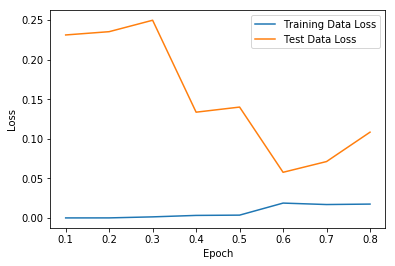

In [250]:
plt.plot(ratio,testLoss, label='Training Data Loss')
plt.plot(ratio,trainLoss,label='Test Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()